In [1]:
#Converting SAS -> CSV
import pyreadstat

# Read the SAS file 
sasfile_path = 'C:/Users/kentv/OneDrive/Desktop/ML/ML Proj - PRAM/Data/raw/phase8_arf_2016_2022.sas7bdat'
df, meta = pyreadstat.read_sas7bdat(sasfile_path)

# Save as CSV
csvfile_path = 'C:/Users/kentv/OneDrive/Desktop/ML/ML Proj - PRAM/Data/raw/rawPhase8ARF.csv'
df.to_csv(csvfile_path, index=False)

print("Conversion complete!") 

Conversion complete!


In [79]:
#Cleaning Raw Dataset -> Clean Dataset v1/Full Relevant Feature Dataset
import pandas as pd

csvfile_path = 'C:/Users/kentv/OneDrive/Desktop/ML/ML Proj - PRAM/Data/raw/rawPhase8ARF.csv'
rawPhase8ARF = pd.read_csv(csvfile_path, low_memory=False)

# Variables of interest and target
variables_of_interest = [
    "STATE", "MAT_RACE_PU", "PAT_RACE_PU", "HISPANIC", "MARRIED", "MAT_WIC", "PAT_ACK",
    "BPG_DIAB8", "BPG_HBP8", "BPG_DEPRS8", "HTH_ASMA", "HTH_THYR", "HTH_PCOS", "HTH_ANX",
    "TLK_WT_RAW", "ASK_MEDS_RAW", "TLK_CIGS_RAW", "TLK_ETOH_RAW", "ASK_ABUS_RAW", "ASK_DPRS_RAW",
    "ASK_DRUG_RAW", "ASK_HIVT_RAW", "ASK_BF_RAW", "ASK_PPBC_RAW", "PG_GDB8", "MORB_BP8", "MH_PGDX8",
    "PAB6HUS", "PAB_XHUS", "PAB_FAM", "PAB_OTH", "PAD6HUS", "PAD_XHUS", "PAD_FAM", "PAD_OTH",
    "INCOME8", "MAT_DEG", "PAT_DEG", "PAY", "MOM_LBKG", "ILLB_MO"
]
target_variables = ["INF_LIVE"]

# Keep Variables of Interest & Remove NA of Target Variable
cleaned_data = rawPhase8ARF[variables_of_interest + target_variables].copy()
cleaned_data.dropna(subset=target_variables, inplace=True)

# Separate numerical and categorical variables
numerical_vars = ["MOM_LBKG", "ILLB_MO", "INCOME8"]
categorical_vars = [col for col in variables_of_interest if col not in numerical_vars + ["STATE"]]

# Replace missing values
for column in numerical_vars:
    cleaned_data[column] = cleaned_data[column].fillna(cleaned_data[column].median())
for column in categorical_vars:
    cleaned_data[column] = cleaned_data[column].fillna(cleaned_data[column].mode()[0])

# Remove outliers using the IQR method with adjusted thresholds 
#commented out due to all numerical variables being heavily skewed and outliers may contain important information 
# for var in numerical_vars:
#     if var == "INCOME8":
#         continue  # Skip 'INCOME8'
#     Q1 = cleaned_data[var].quantile(0.25)
#     Q3 = cleaned_data[var].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR  # Adjusted multiplier
#     upper_bound = Q3 + 1.5 * IQR
#     cleaned_data = cleaned_data[(cleaned_data[var] >= lower_bound) & (cleaned_data[var] <= upper_bound)]

# Target encoding for STATE
state_target_means = cleaned_data.groupby("STATE")["INF_LIVE"].mean()
cleaned_data["STATE"] = cleaned_data["STATE"].map(state_target_means)
cleaned_data.dropna(subset=["STATE"], inplace=True)  # Handle unmapped states

# Normalize numerical variables using Min-Max Scaling
for var in numerical_vars:
    cleaned_data[var] = (cleaned_data[var] - cleaned_data[var].min()) / (cleaned_data[var].max() - cleaned_data[var].min())

# Modify binary categorical columns (1 -> 0, 2 -> 1)
columns_to_modify = [
    'INF_LIVE', 'HISPANIC', 'MARRIED', 'MAT_WIC', 'PAT_ACK', 'BPG_DIAB8', 'BPG_HBP8', 
    'BPG_DEPRS8', 'HTH_ASMA', 'HTH_THYR', 'HTH_PCOS', 'HTH_ANX', 'TLK_WT_RAW', 
    'ASK_MEDS_RAW', 'TLK_CIGS_RAW', 'TLK_ETOH_RAW', 'ASK_ABUS_RAW', 'ASK_DPRS_RAW', 
    'ASK_DRUG_RAW', 'ASK_HIVT_RAW', 'ASK_BF_RAW', 'ASK_PPBC_RAW', 'PG_GDB8', 'MORB_BP8', 
    'MH_PGDX8', 'PAB6HUS', 'PAB_XHUS', 'PAB_FAM', 'PAB_OTH', 'PAD6HUS', 'PAD_XHUS', 
    'PAD_FAM', 'PAD_OTH'
]
for col in columns_to_modify:
    cleaned_data[col] = cleaned_data[col].replace({1: 0, 2: 1})

output_file_path = 'C:/Users/kentv/OneDrive/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv1.csv'
cleaned_data.to_csv(output_file_path, index=False)
print(f"Cleaned dataset saved to {output_file_path}")

Cleaned dataset saved to C:/Users/kentv/OneDrive/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv1.csv


In [80]:
#Reduced Feature Set
import pandas as pd

csvfile_path = 'C:/Users/kentv/OneDrive/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv1.csv'
data = pd.read_csv(csvfile_path)

# Define the features to keep
features_to_keep = [
 "HTH_PCOS", "HTH_THYR", "ASK_BF_RAW", "TLK_CIGS_RAW", "TLK_ETOH_RAW",
    "PAD_FAM", "PAT_ACK", "PAT_DEG", "MAT_DEG",
    "INF_LIVE"
]

data_reduced = data[features_to_keep].copy()

output_file_path =  'C:/Users/kentv/OneDrive/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv2.csv'
data_reduced.to_csv(output_file_path, index=False)

print(f"Reduced dataset saved to {output_file_path}")

Reduced dataset saved to C:/Users/kentv/OneDrive/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv2.csv


In [81]:
# Apply One-Hot Encoding to MAT_RACE_PU, PAT_RACE_PU, and PAY
#Variables no longer in Reduced Dataset/v2so no need to hot encode
import pandas as pd

file_path_v1 = 'C:/Users/kentv/OneDrive/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv1.csv'
#file_path_v2 = 'C:/Users/Kent/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv2.csv'

cleaned_data_v1 = pd.read_csv(file_path_v1)
#cleaned_data_v2 = pd.read_csv(file_path_v2)

# Apply One-Hot Encoding to MAT_RACE_PU, PAT_RACE_PU, and PAY columns
cleaned_data_v1 = pd.get_dummies(cleaned_data_v1, columns=["MAT_RACE_PU", "PAT_RACE_PU", "PAY"], drop_first=True)
#cleaned_data_v2 = pd.get_dummies(cleaned_data_v2, columns=[ "PAT_RACE_PU","PAY","MAT_RACE_PU"], drop_first=True) 

# Move the 'INF_LIVE' column to the end
inf_live_col = cleaned_data_v1.pop("INF_LIVE")  
cleaned_data_v1["INF_LIVE"] = inf_live_col     
#cleaned_data_v2["INF_LIVE"] = inf_live_col  

cleaned_data_v1.to_csv(file_path_v1, index=False)
#cleaned_data_v2.to_csv(file_path_v2, index=False)

print(f"One-hot encoded dataset saved to {file_path_v1}")
#print(f"One-hot encoded dataset saved to {file_path_v2}")

One-hot encoded dataset saved to C:/Users/kentv/OneDrive/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv1.csv



Processing Full Feature Dataset (v1):

Accuracy: 0.9441343069678564

Classification Report:
              precision    recall  f1-score   support

         0.0       0.02      0.12      0.04       646
         1.0       0.99      0.95      0.97     72619

    accuracy                           0.94     73265
   macro avg       0.51      0.54      0.50     73265
weighted avg       0.98      0.94      0.96     73265


True Positive Rate: 0.95
True Negative Rate: 0.12

Confusion Matrix:
[[   78   568]
 [ 3525 69094]]

ROC AUC: 0.64

Average Precision: 0.99


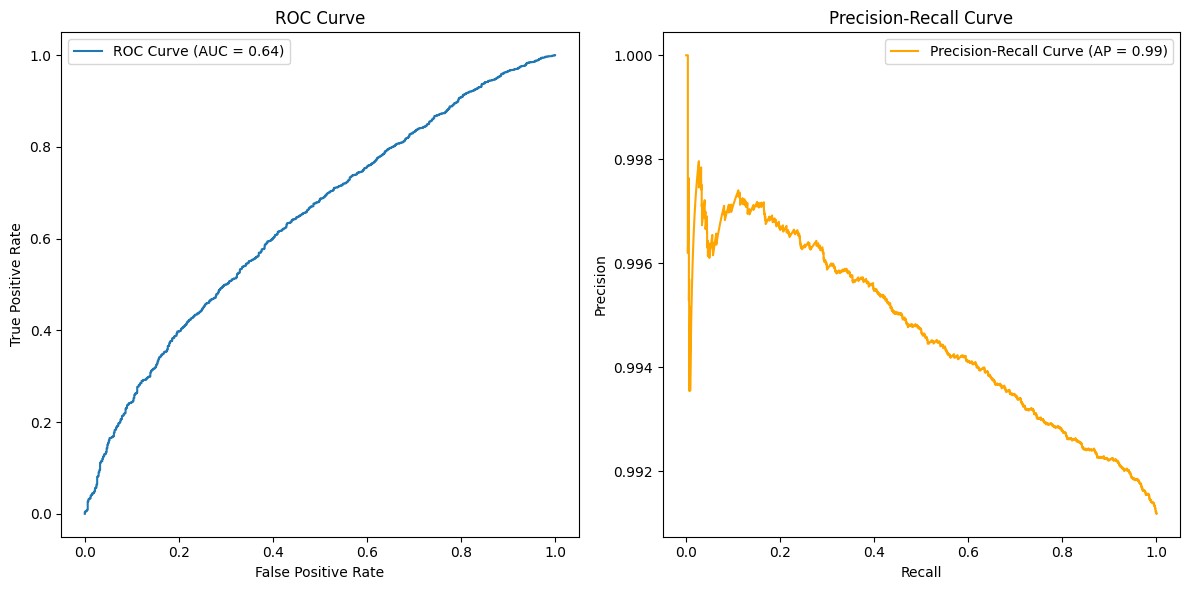

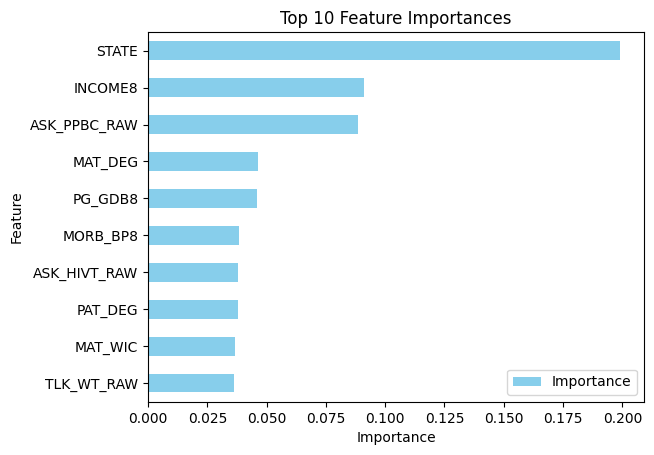


Processing Reduced Feature Dataset (v2):

Accuracy: 0.7321640619668327

Classification Report:
              precision    recall  f1-score   support

         0.0       0.01      0.39      0.03       646
         1.0       0.99      0.74      0.84     72619

    accuracy                           0.73     73265
   macro avg       0.50      0.56      0.43     73265
weighted avg       0.98      0.73      0.84     73265


True Positive Rate: 0.74
True Negative Rate: 0.39

Confusion Matrix:
[[  253   393]
 [19230 53389]]

ROC AUC: 0.57

Average Precision: 0.99


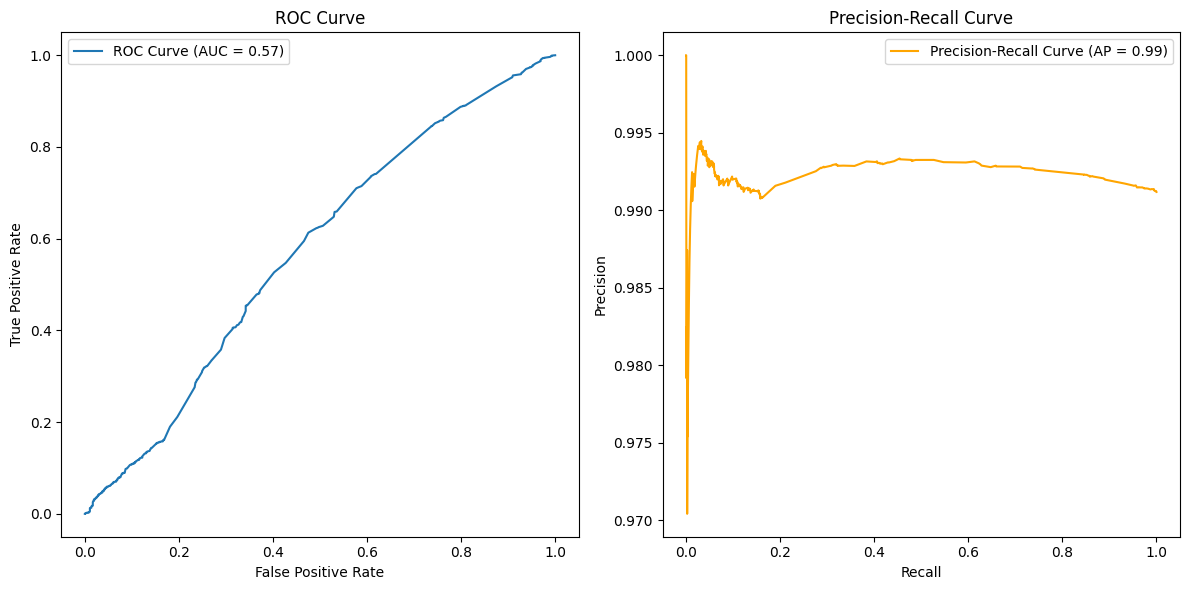

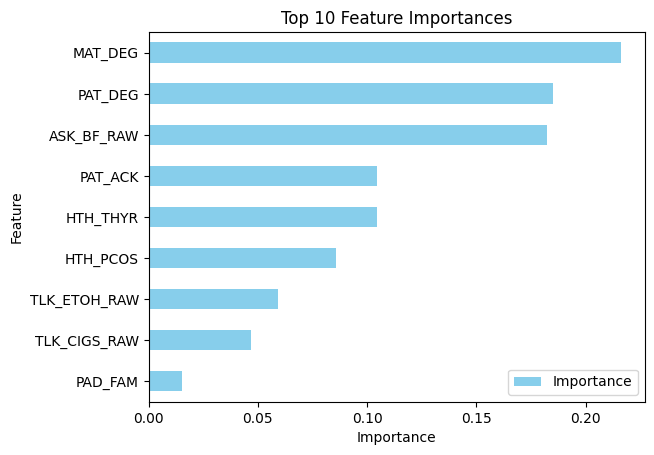

In [51]:
#Random Forest w/ SMOTE & Performance Metrics & Feature Importance List
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score, roc_curve,
    confusion_matrix, precision_recall_curve, average_precision_score
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np

file_path_v1 = 'C:/Users/kentv/OneDrive/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv1.csv'
file_path_v2 = 'C:/Users/kentv/OneDrive/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv2.csv'
data_v1 = pd.read_csv(file_path_v1)  # Full feature dataset
data_v2 = pd.read_csv(file_path_v2)  # Reduced feature dataset

target_col = 'INF_LIVE'

def preprocess_and_split(data, target_col):
    data = data.drop(columns=['ID'], errors='ignore')  
    
    # Separate features and target
    X = data.drop(columns=[target_col])
    y = data[target_col]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=2003, stratify=y
    )
    
    return X_train, X_test, y_train, y_test

def apply_smote(X_train, y_train):
    smote = SMOTE(sampling_strategy='auto', random_state=2003)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    return X_resampled, y_resampled

def evaluate_and_print_metrics(y_test, y_test_pred, y_test_proba, feature_importances, feature_names):
    print("\nAccuracy:", accuracy_score(y_test, y_test_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))
    
    cm = confusion_matrix(y_test, y_test_pred)
    tn, fp, fn, tp = cm.ravel()
    print(f"\nTrue Positive Rate: {tp / (tp + fn):.2f}")
    print(f"True Negative Rate: {tn / (tn + fp):.2f}")
    
    print("\nConfusion Matrix:")
    print(cm)
    
    # ROC Curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
    auc = roc_auc_score(y_test, y_test_proba)
    print(f"\nROC AUC: {auc:.2f}")
    
    plt.figure(figsize=(12, 6)) 
    
    # ROC Curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    avg_precision = average_precision_score(y_test, y_test_proba)
    print(f"\nAverage Precision: {avg_precision:.2f}")
    
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f"Precision-Recall Curve (AP = {avg_precision:.2f})", color='orange')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()

    plt.tight_layout()  
    plt.show()

    # Feature Importance Plot (Top 10 Features)
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)
    
    top_10_features = feature_importance_df.head(10)
    top_10_features.plot(kind='barh', x='Feature', y='Importance', title='Top 10 Feature Importances', color='skyblue')
    plt.gca().invert_yaxis()
    plt.xlabel('Importance')
    plt.show()

def train_and_evaluate(X_train, X_test, y_train, y_test, feature_names):
    # Train Random Forest
    rf = RandomForestClassifier(
                    max_depth=15,
                    min_samples_split=20,
                    min_samples_leaf=10,
                    n_jobs=3,
                    class_weight='balanced',
                    random_state=2003)
    rf.fit(X_train, y_train)
    
    y_test_pred = rf.predict(X_test)
    y_test_proba = rf.predict_proba(X_test)[:, 1]
    
    evaluate_and_print_metrics(y_test, y_test_pred, y_test_proba, rf.feature_importances_, feature_names)

print("\nFull Feature Dataset (v1):")
X_train_full, X_test_full, y_train_full, y_test_full = preprocess_and_split(data_v1, target_col)
X_train_full_smote, y_train_full_smote = apply_smote(X_train_full, y_train_full)
train_and_evaluate(X_train_full_smote, X_test_full, y_train_full_smote, y_test_full, X_train_full.columns)

print("\nReduced Feature Dataset (v2):")
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = preprocess_and_split(data_v2, target_col)
X_train_reduced_smote, y_train_reduced_smote = apply_smote(X_train_reduced, y_train_reduced)
train_and_evaluate(X_train_reduced_smote, X_test_reduced, y_train_reduced_smote, y_test_reduced, X_train_reduced.columns)


Processing Full Feature Dataset (v1):
Before ADASYN - Target Distribution:
INF_LIVE
1.0    0.99119
0.0    0.00881
Name: proportion, dtype: float64

After ADASYN - Target Distribution:
INF_LIVE
1.0    0.500146
0.0    0.499854
Name: proportion, dtype: float64

Accuracy: 0.9397256534498055

Classification Report:
              precision    recall  f1-score   support

         0.0       0.02      0.14      0.04       646
         1.0       0.99      0.95      0.97     72619

    accuracy                           0.94     73265
   macro avg       0.51      0.54      0.50     73265
weighted avg       0.98      0.94      0.96     73265


Confusion Matrix:
[[   90   556]
 [ 3860 68759]]

ROC AUC: 0.64

Average Precision: 0.99


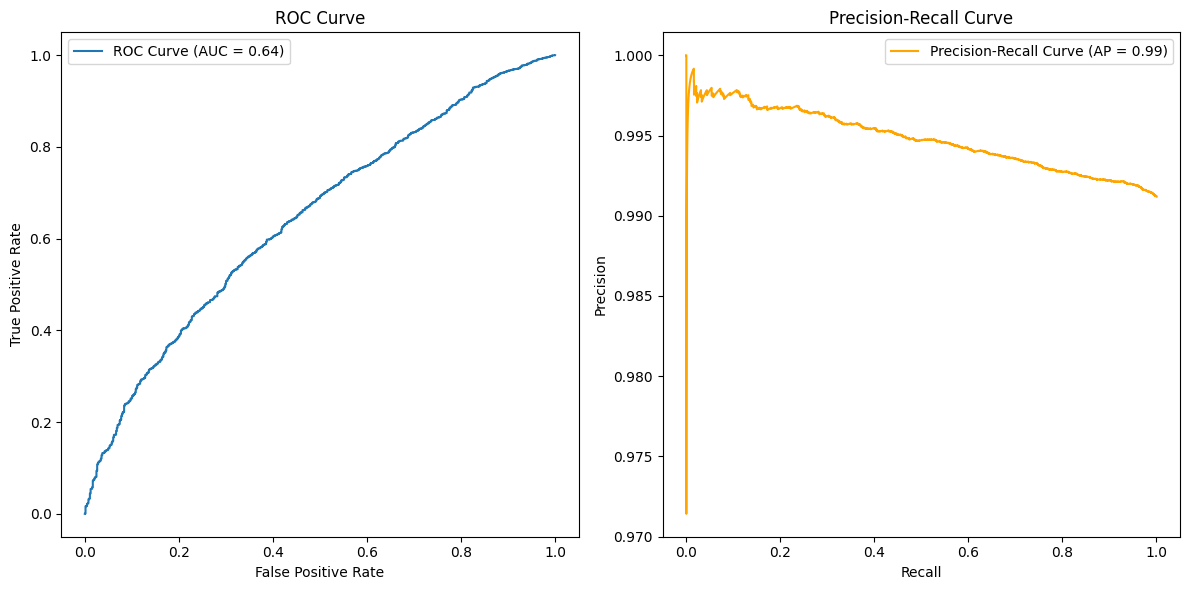

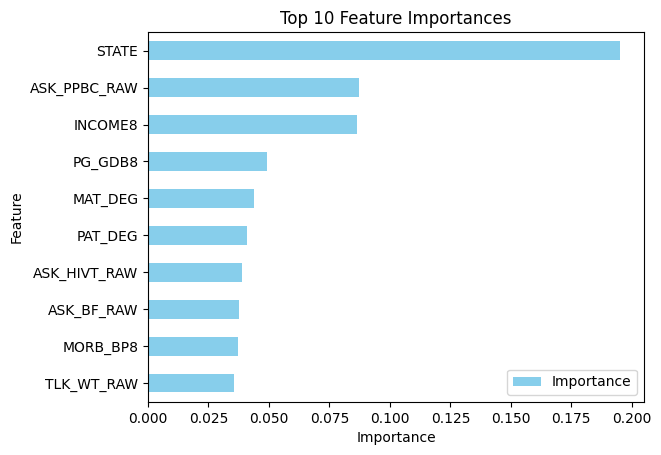


Processing Reduced Feature Dataset (v2):
Before ADASYN - Target Distribution:
INF_LIVE
1.0    0.99119
0.0    0.00881
Name: proportion, dtype: float64

After ADASYN - Target Distribution:
INF_LIVE
0.0    0.50086
1.0    0.49914
Name: proportion, dtype: float64

Accuracy: 0.7112127209445165

Classification Report:
              precision    recall  f1-score   support

         0.0       0.01      0.42      0.02       646
         1.0       0.99      0.71      0.83     72619

    accuracy                           0.71     73265
   macro avg       0.50      0.57      0.43     73265
weighted avg       0.98      0.71      0.82     73265


Confusion Matrix:
[[  270   376]
 [20782 51837]]

ROC AUC: 0.57

Average Precision: 0.99


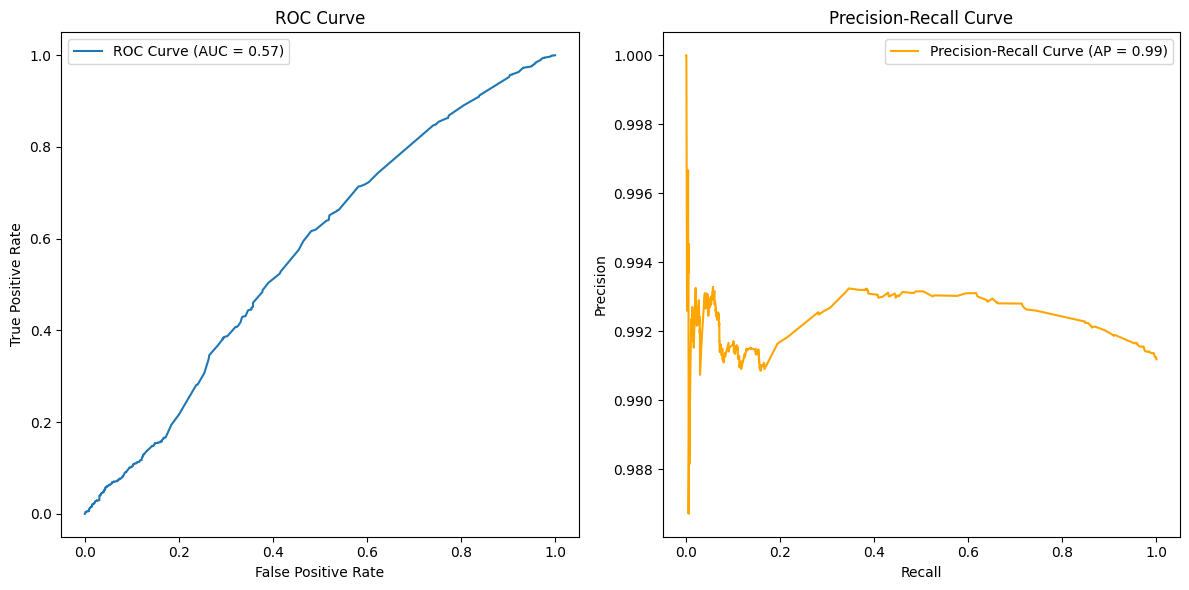

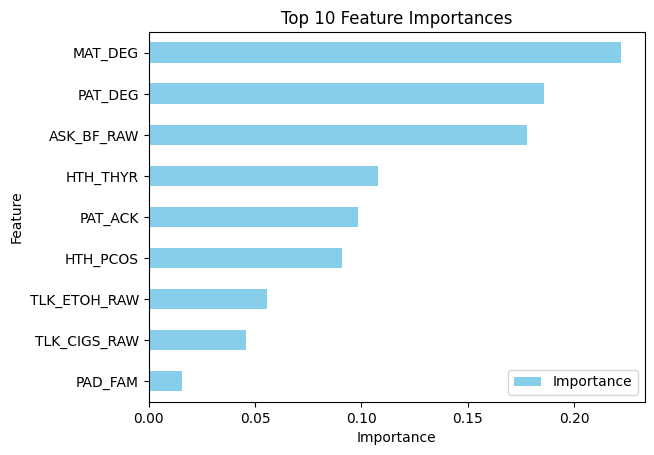

In [53]:
#Random Forest w/ ADASYN
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score, roc_curve,
    confusion_matrix, precision_recall_curve, average_precision_score
)
from imblearn.over_sampling import ADASYN
import matplotlib.pyplot as plt

file_path_v1 = 'C:/Users/kentv/OneDrive/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv1.csv'
file_path_v2 = 'C:/Users/kentv/OneDrive/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv2.csv'
data_v1 = pd.read_csv(file_path_v1)  # Full feature dataset
data_v2 = pd.read_csv(file_path_v2)  # Reduced feature dataset

target_col = 'INF_LIVE'

def preprocess_and_split(data, target_col):
    data = data.drop(columns=['ID'], errors='ignore')
    
    # Separate features and target
    X = data.drop(columns=[target_col])
    y = data[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=2003, stratify=y
    )
    
    return X_train, X_test, y_train, y_test

def apply_adasyn(X_train, y_train):

    adasyn = ADASYN(sampling_strategy='minority', random_state=2003)
    X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

    return X_resampled, y_resampled

def evaluate_and_print_metrics(y_test, y_test_pred, y_test_proba, feature_importances, feature_names):
    print("\nAccuracy:", accuracy_score(y_test, y_test_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))
    
    cm = confusion_matrix(y_test, y_test_pred)
    print("\nConfusion Matrix:")
    print(cm)
    
    # ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    auc = roc_auc_score(y_test, y_test_proba)
    print(f"\nROC AUC: {auc:.2f}")
    
    plt.figure(figsize=(12, 6))
    
    # ROC Curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    
    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    avg_precision = average_precision_score(y_test, y_test_proba)
    print(f"\nAverage Precision: {avg_precision:.2f}")
    
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f"Precision-Recall Curve (AP = {avg_precision:.2f})", color='orange')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Feature Importance
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)
    
    feature_importance_df.head(10).plot(kind='barh', x='Feature', y='Importance', title='Top 10 Feature Importances', color='skyblue')
    plt.gca().invert_yaxis()
    plt.xlabel('Importance')
    plt.show()

def train_and_evaluate(X_train, X_test, y_train, y_test, feature_names):
    # Train Random Forest
    rf = RandomForestClassifier(
        max_depth=15,
        min_samples_split=20,
        min_samples_leaf=10,
        n_jobs=3,
        class_weight='balanced',
        random_state=2003
    )
    rf.fit(X_train, y_train)
    
    y_test_pred = rf.predict(X_test)
    y_test_proba = rf.predict_proba(X_test)[:, 1]
    
    evaluate_and_print_metrics(y_test, y_test_pred, y_test_proba, rf.feature_importances_, feature_names)

print("\nFull Feature Dataset (v1):")
X_train_full, X_test_full, y_train_full, y_test_full = preprocess_and_split(data_v1, target_col)
X_train_full_adasyn, y_train_full_adasyn = apply_adasyn(X_train_full, y_train_full)
train_and_evaluate(X_train_full_adasyn, X_test_full, y_train_full_adasyn, y_test_full, X_train_full.columns)

print("\nReduced Feature Dataset (v2):")
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = preprocess_and_split(data_v2, target_col)
X_train_reduced_adasyn, y_train_reduced_adasyn = apply_adasyn(X_train_reduced, y_train_reduced)
train_and_evaluate(X_train_reduced_adasyn, X_test_reduced, y_train_reduced_adasyn, y_test_reduced, X_train_reduced.columns)


Processing Full Feature Dataset (v1):
Before NCL - Target Counts:
INF_LIVE
1.0    169443
0.0      1506
Name: count, dtype: int64

After NCL - Target Counts:
INF_LIVE
1.0    165143
0.0      1506
Name: count, dtype: int64

Accuracy: 0.9586705794035351

Classification Report:
              precision    recall  f1-score   support

         0.0       0.03      0.10      0.04       646
         1.0       0.99      0.97      0.98     72619

    accuracy                           0.96     73265
   macro avg       0.51      0.53      0.51     73265
weighted avg       0.98      0.96      0.97     73265


Confusion Matrix:
[[   67   579]
 [ 2449 70170]]

ROC AUC: 0.68

Average Precision: 1.00


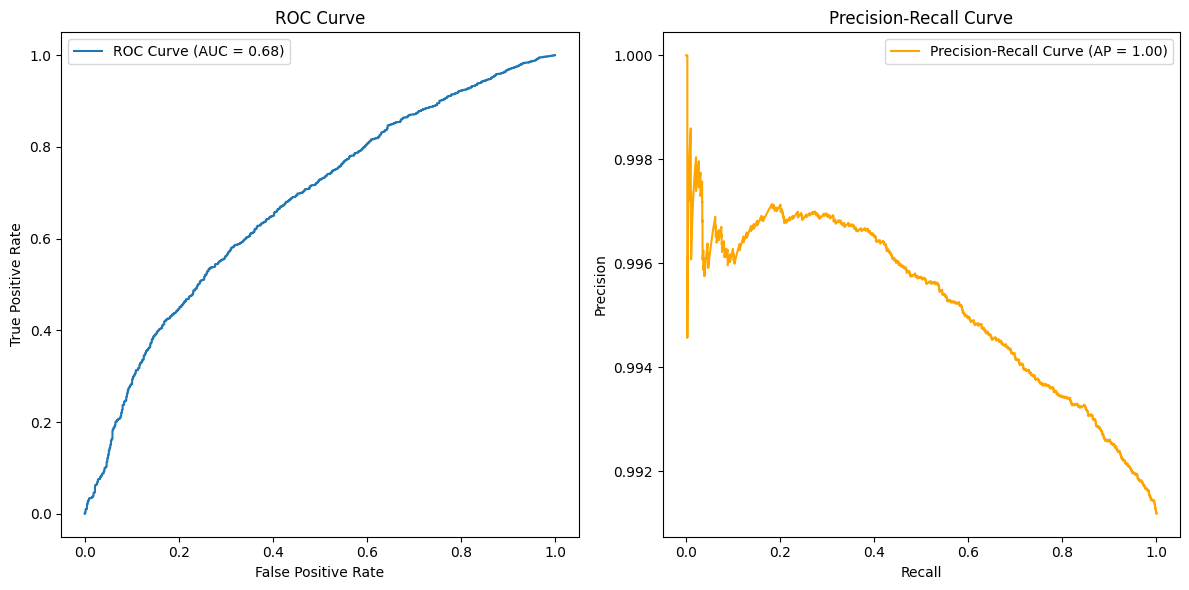

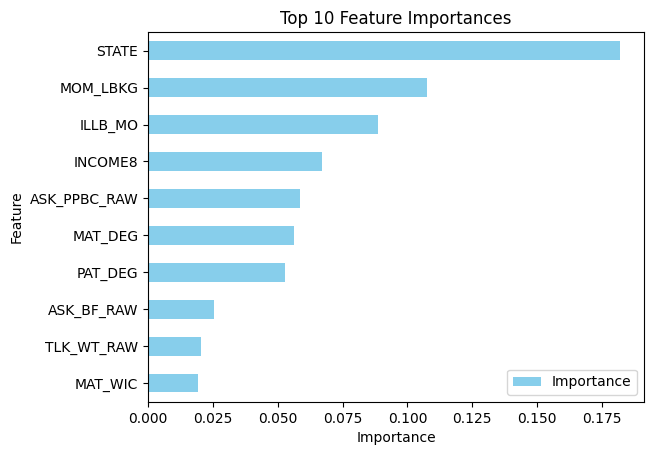


Processing Reduced Feature Dataset (v2):
Before NCL - Target Counts:
INF_LIVE
1.0    169443
0.0      1506
Name: count, dtype: int64

After NCL - Target Counts:
INF_LIVE
1.0    168617
0.0      1506
Name: count, dtype: int64

Accuracy: 0.677008121203849

Classification Report:
              precision    recall  f1-score   support

         0.0       0.01      0.47      0.03       646
         1.0       0.99      0.68      0.81     72619

    accuracy                           0.68     73265
   macro avg       0.50      0.57      0.42     73265
weighted avg       0.98      0.68      0.80     73265


Confusion Matrix:
[[  304   342]
 [23322 49297]]

ROC AUC: 0.59

Average Precision: 0.99


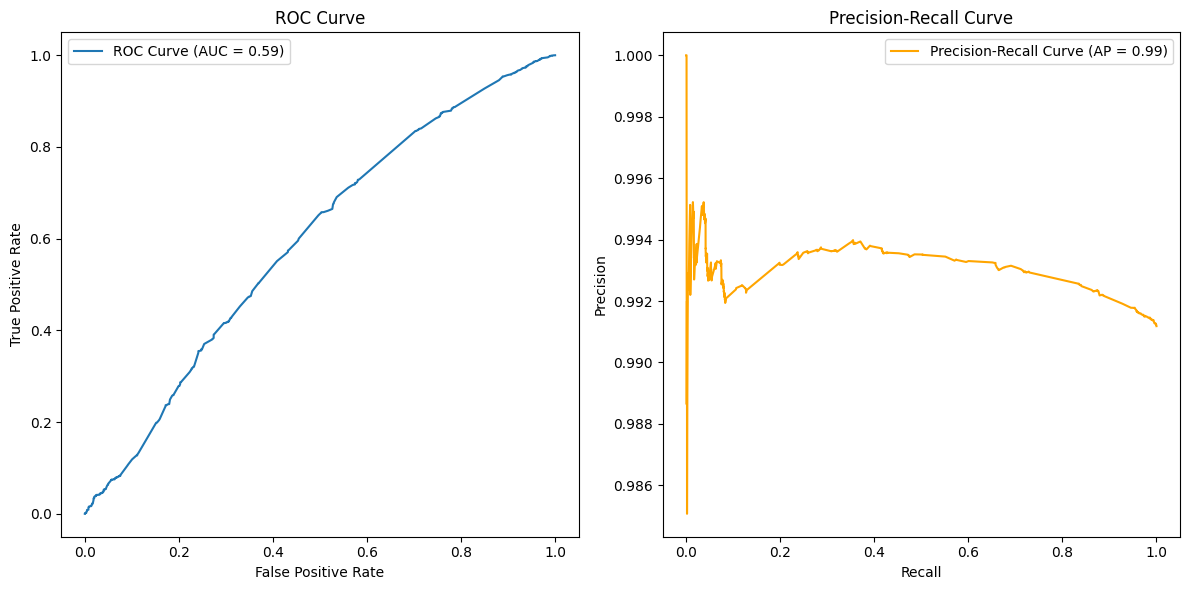

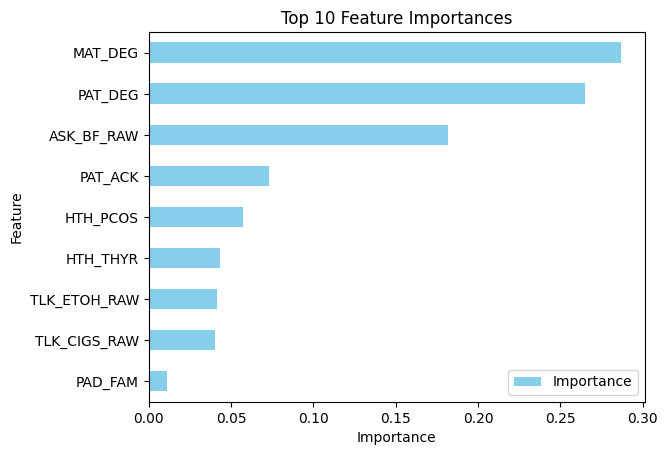

In [59]:
#Random Forest w/ NCL
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score, roc_curve,
    confusion_matrix, precision_recall_curve, average_precision_score
)
from imblearn.under_sampling import NeighbourhoodCleaningRule
import matplotlib.pyplot as plt

file_path_v1 = 'C:/Users/kentv/OneDrive/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv1.csv'
file_path_v2 = 'C:/Users/kentv/OneDrive/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv2.csv'
data_v1 = pd.read_csv(file_path_v1)  # Full feature dataset
data_v2 = pd.read_csv(file_path_v2)  # Reduced feature dataset

target_col = 'INF_LIVE'

def preprocess_and_split(data, target_col):
    data = data.drop(columns=['ID'], errors='ignore')
    
    # Separate features and target
    X = data.drop(columns=[target_col])
    y = data[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=2003, stratify=y
    )
    
    return X_train, X_test, y_train, y_test

def apply_ncl(X_train, y_train):
    ncl = NeighbourhoodCleaningRule(sampling_strategy='auto')
    X_resampled, y_resampled = ncl.fit_resample(X_train, y_train)

    return X_resampled, y_resampled

def evaluate_and_print_metrics(y_test, y_test_pred, y_test_proba, feature_importances, feature_names):
    print("\nAccuracy:", accuracy_score(y_test, y_test_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))
    
    cm = confusion_matrix(y_test, y_test_pred)
    print("\nConfusion Matrix:")
    print(cm)
    
    # ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    auc = roc_auc_score(y_test, y_test_proba)
    print(f"\nROC AUC: {auc:.2f}")
    
    plt.figure(figsize=(12, 6))
    
    # ROC Curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    
    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    avg_precision = average_precision_score(y_test, y_test_proba)
    print(f"\nAverage Precision: {avg_precision:.2f}")
    
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f"Precision-Recall Curve (AP = {avg_precision:.2f})", color='orange')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Feature Importance
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)
    
    feature_importance_df.head(10).plot(kind='barh', x='Feature', y='Importance', title='Top 10 Feature Importances', color='skyblue')
    plt.gca().invert_yaxis()
    plt.xlabel('Importance')
    plt.show()

def train_and_evaluate(X_train, X_test, y_train, y_test, feature_names):
    # Train Random Forest
    rf = RandomForestClassifier(
        max_depth=15,
        min_samples_split=20,
        min_samples_leaf=10,
        n_jobs=3,
        class_weight='balanced',
        random_state=2003
    )
    rf.fit(X_train, y_train)
    
    y_test_pred = rf.predict(X_test)
    y_test_proba = rf.predict_proba(X_test)[:, 1]
    
    evaluate_and_print_metrics(y_test, y_test_pred, y_test_proba, rf.feature_importances_, feature_names)

print("\nFull Feature Dataset (v1):")
X_train_full, X_test_full, y_train_full, y_test_full = preprocess_and_split(data_v1, target_col)
X_train_full_ncl, y_train_full_ncl = apply_ncl(X_train_full, y_train_full)
train_and_evaluate(X_train_full_ncl, X_test_full, y_train_full_ncl, y_test_full, X_train_full.columns)

print("\nReduced Feature Dataset (v2):")
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = preprocess_and_split(data_v2, target_col)
X_train_reduced_ncl, y_train_reduced_ncl = apply_ncl(X_train_reduced, y_train_reduced)
train_and_evaluate(X_train_reduced_ncl, X_test_reduced, y_train_reduced_ncl, y_test_reduced, X_train_reduced.columns)


Processing Full Feature Dataset (v1):

Accuracy: 0.6897563638845288

Classification Report:
              precision    recall  f1-score   support

         0.0       0.01      0.40      0.02       646
         1.0       0.99      0.69      0.82     72619

    accuracy                           0.69     73265
   macro avg       0.50      0.55      0.42     73265
weighted avg       0.98      0.69      0.81     73265


True Positive Rate: 0.69
True Negative Rate: 0.40

Confusion Matrix:
[[  259   387]
 [22343 50276]]

ROC AUC: 0.56

Average Precision: 0.99


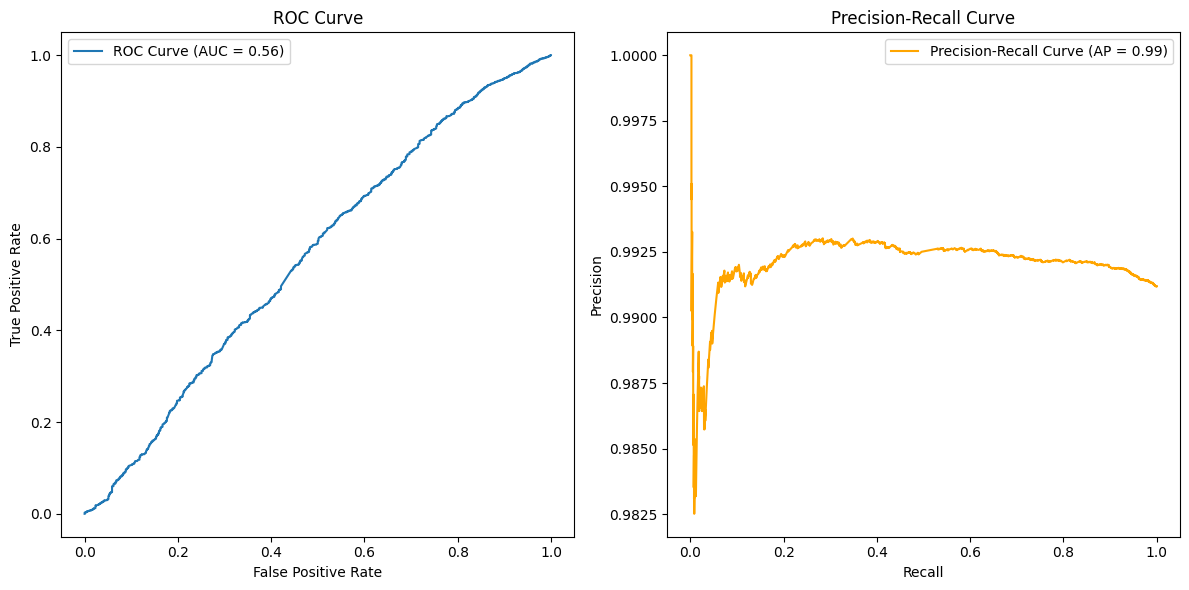

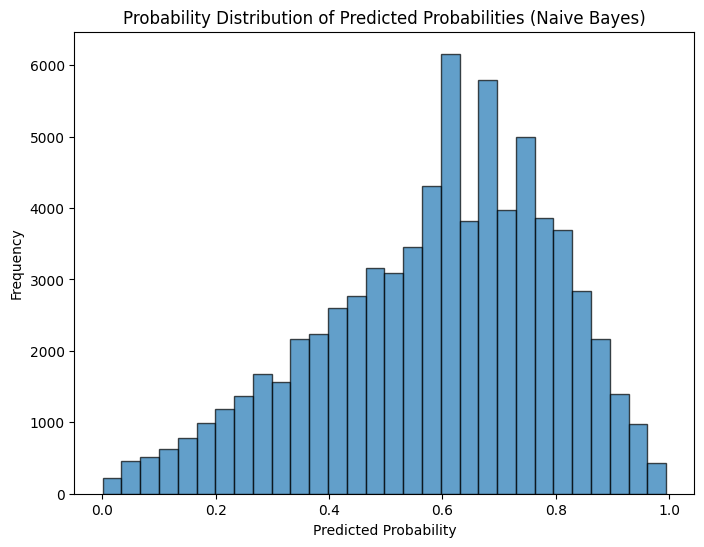


Processing Reduced Feature Dataset (v2):

Accuracy: 0.7197979935849315

Classification Report:
              precision    recall  f1-score   support

         0.0       0.01      0.44      0.03       646
         1.0       0.99      0.72      0.84     72619

    accuracy                           0.72     73265
   macro avg       0.50      0.58      0.43     73265
weighted avg       0.98      0.72      0.83     73265


True Positive Rate: 0.72
True Negative Rate: 0.44

Confusion Matrix:
[[  287   359]
 [20170 52449]]

ROC AUC: 0.59

Average Precision: 0.99


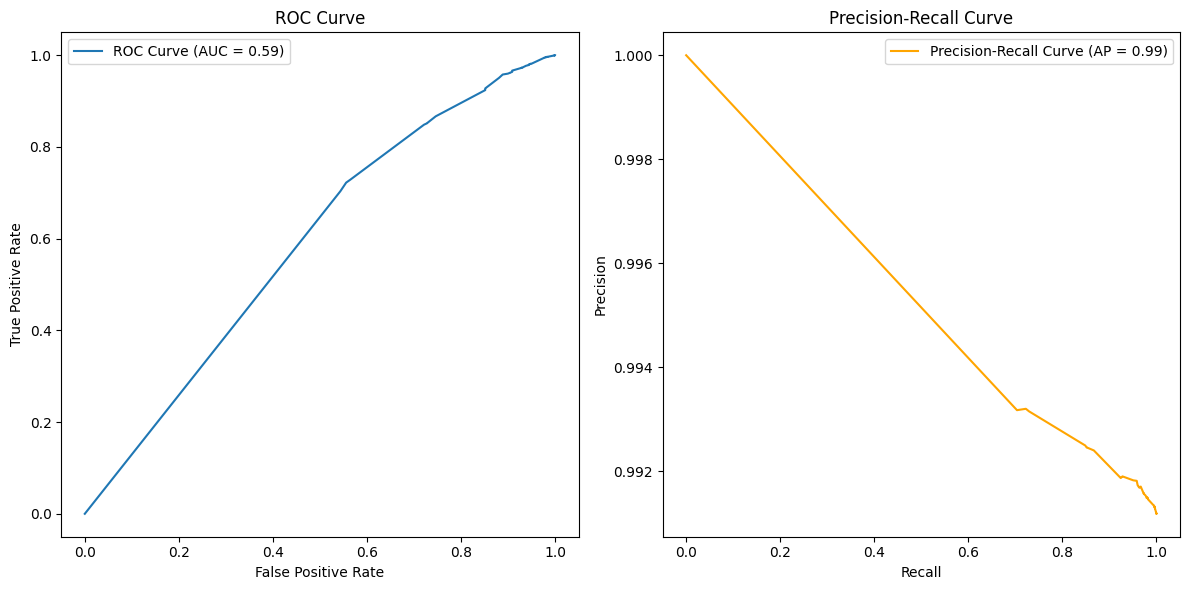

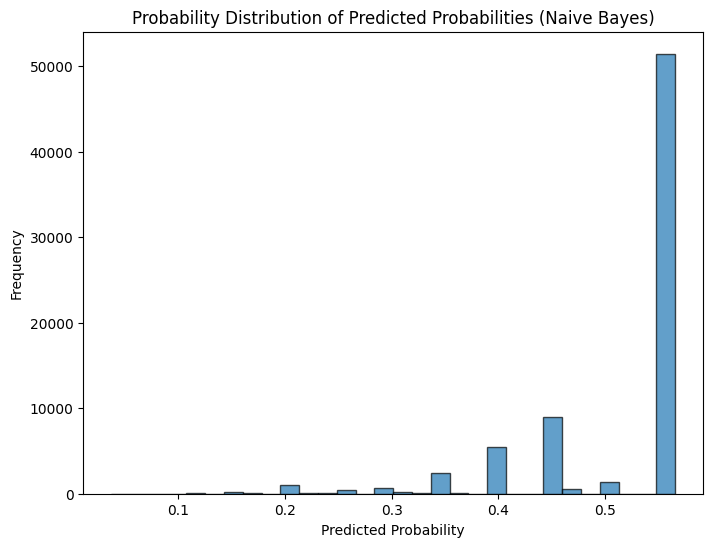

In [52]:
# Naive Bayes w/ SMOTE & Performance Metrics & Probability Distribution
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score, roc_curve,
    confusion_matrix, precision_recall_curve, average_precision_score
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

file_path_v1 = 'C:/Users/kentv/OneDrive/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv1.csv'
file_path_v2 = 'C:/Users/kentv/OneDrive/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv2.csv'
data_v1 = pd.read_csv(file_path_v1)  # Full feature dataset
data_v2 = pd.read_csv(file_path_v2)  # Reduced feature dataset

target_col = 'INF_LIVE'

def preprocess_and_split(data, target_col):
    data = data.drop(columns=['ID'], errors='ignore') 
    
    X = data.drop(columns=[target_col])
    y = data[target_col]
    
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=2003, stratify=y
    )
    
    return X_train, X_test, y_train, y_test

def apply_smote(X_train, y_train):
    smote = SMOTE(sampling_strategy='auto', random_state=2003)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    return X_resampled, y_resampled

def evaluate_and_print_metrics(y_test, y_test_pred, y_test_proba):
    # Accuracy
    print("\nAccuracy:", accuracy_score(y_test, y_test_pred))
    
    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    tn, fp, fn, tp = cm.ravel()
    print(f"\nTrue Positive Rate: {tp / (tp + fn):.2f}")
    print(f"True Negative Rate: {tn / (tn + fp):.2f}")
    
    print("\nConfusion Matrix:")
    print(cm)
    
    # ROC Curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
    auc = roc_auc_score(y_test, y_test_proba)
    print(f"\nROC AUC: {auc:.2f}")
    
    plt.figure(figsize=(12, 6)) 
    
    # ROC Curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    avg_precision = average_precision_score(y_test, y_test_proba)
    print(f"\nAverage Precision: {avg_precision:.2f}")
    
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f"Precision-Recall Curve (AP = {avg_precision:.2f})", color='orange')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()

    plt.tight_layout()  
    plt.show()

    # Probability Distribution Plot
    plt.figure(figsize=(8, 6))
    plt.hist(y_test_proba, bins=30, edgecolor='black', alpha=0.7)
    plt.title("Probability Distribution of Predicted Probabilities (Naive Bayes)")
    plt.xlabel("Predicted Probability")
    plt.ylabel("Frequency")
    plt.show()

def train_and_evaluate(X_train, X_test, y_train, y_test):
    # Train Bernoulli Naive Bayes 
    nb = BernoulliNB()
    nb.fit(X_train, y_train)

    y_test_pred = nb.predict(X_test)
    y_test_proba = nb.predict_proba(X_test)[:, 1]
    
    evaluate_and_print_metrics(y_test, y_test_pred, y_test_proba)

print("\nFull Feature Dataset (v1):")
X_train_full, X_test_full, y_train_full, y_test_full = preprocess_and_split(data_v1, target_col)
X_train_full_smote, y_train_full_smote = apply_smote(X_train_full, y_train_full)
train_and_evaluate(X_train_full_smote, X_test_full, y_train_full_smote, y_test_full)

print("\nReduced Feature Dataset (v2):")
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = preprocess_and_split(data_v2, target_col)
X_train_reduced_smote, y_train_reduced_smote = apply_smote(X_train_reduced, y_train_reduced)
train_and_evaluate(X_train_reduced_smote, X_test_reduced, y_train_reduced_smote, y_test_reduced)



Full Feature Dataset (v1):

Accuracy: 0.6876134579949499

Classification Report:
              precision    recall  f1-score   support

         0.0       0.01      0.39      0.02       646
         1.0       0.99      0.69      0.81     72619

    accuracy                           0.69     73265
   macro avg       0.50      0.54      0.42     73265
weighted avg       0.98      0.69      0.81     73265


True Positive Rate: 0.69
True Negative Rate: 0.39

Confusion Matrix:
[[  255   391]
 [22496 50123]]

ROC AUC: 0.56

Average Precision: 0.99


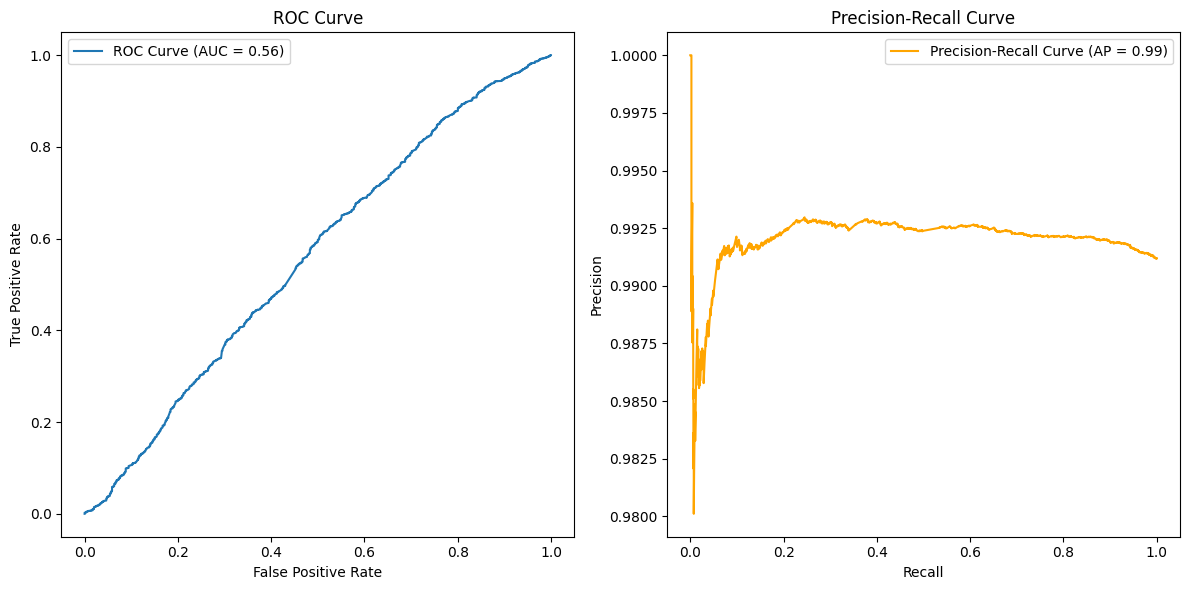

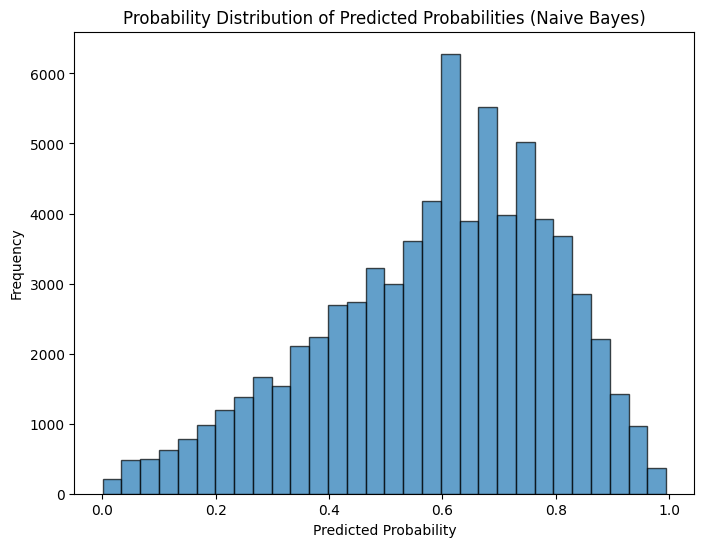


Reduced Feature Dataset (v2):

Accuracy: 0.7197979935849315

Classification Report:
              precision    recall  f1-score   support

         0.0       0.01      0.44      0.03       646
         1.0       0.99      0.72      0.84     72619

    accuracy                           0.72     73265
   macro avg       0.50      0.58      0.43     73265
weighted avg       0.98      0.72      0.83     73265


True Positive Rate: 0.72
True Negative Rate: 0.44

Confusion Matrix:
[[  287   359]
 [20170 52449]]

ROC AUC: 0.59

Average Precision: 0.99


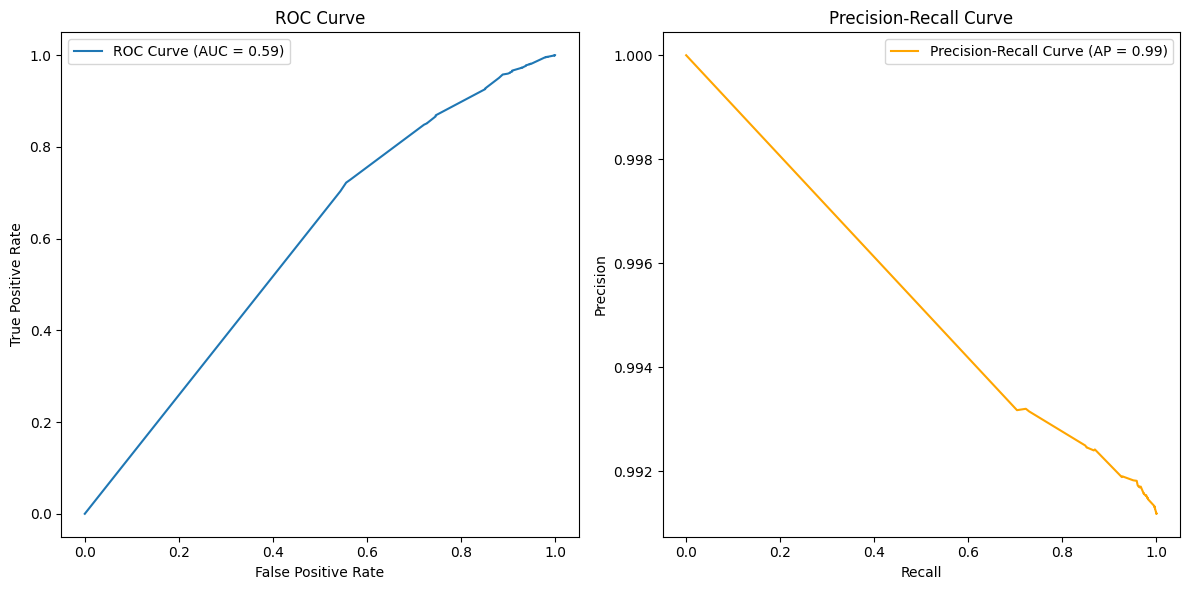

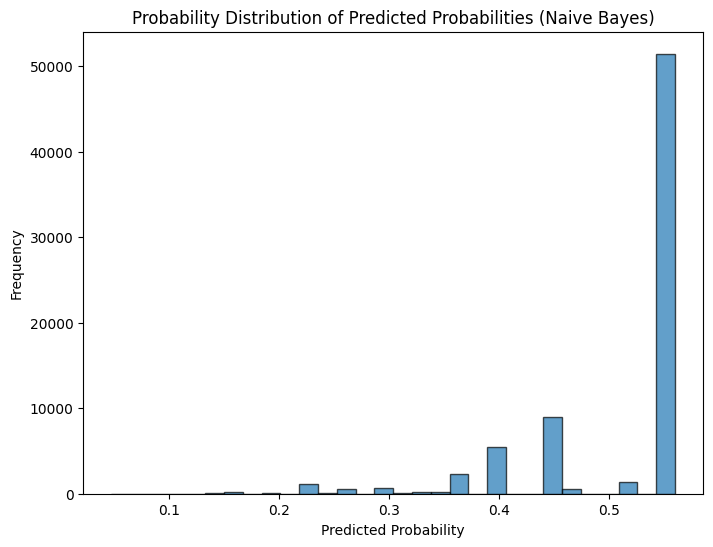

In [64]:
# Naive Bayes w/ ADASYN
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score, roc_curve,
    confusion_matrix, precision_recall_curve, average_precision_score
)
from imblearn.over_sampling import ADASYN
import matplotlib.pyplot as plt

file_path_v1 = 'C:/Users/kentv/OneDrive/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv1.csv'
file_path_v2 = 'C:/Users/kentv/OneDrive/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv2.csv'
data_v1 = pd.read_csv(file_path_v1)  # Full feature dataset
data_v2 = pd.read_csv(file_path_v2)  # Reduced feature dataset

target_col = 'INF_LIVE'

def preprocess_and_split(data, target_col):
    data = data.drop(columns=['ID'], errors='ignore') 
    
    X = data.drop(columns=[target_col])
    y = data[target_col]
    
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=2003, stratify=y
    )
    
    return X_train, X_test, y_train, y_test

def apply_adasyn(X_train, y_train):
    adasyn = ADASYN(sampling_strategy='minority', random_state=2003)
    X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)
    return X_resampled, y_resampled

def evaluate_and_print_metrics(y_test, y_test_pred, y_test_proba):
    print("\nAccuracy:", accuracy_score(y_test, y_test_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))
    
    cm = confusion_matrix(y_test, y_test_pred)
    tn, fp, fn, tp = cm.ravel()
    print(f"\nTrue Positive Rate: {tp / (tp + fn):.2f}")
    print(f"True Negative Rate: {tn / (tn + fp):.2f}")
    
    print("\nConfusion Matrix:")
    print(cm)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
    auc = roc_auc_score(y_test, y_test_proba)
    print(f"\nROC AUC: {auc:.2f}")
    
    plt.figure(figsize=(12, 6)) 
    
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()

    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    avg_precision = average_precision_score(y_test, y_test_proba)
    print(f"\nAverage Precision: {avg_precision:.2f}")
    
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f"Precision-Recall Curve (AP = {avg_precision:.2f})", color='orange')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()

    plt.tight_layout()  
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.hist(y_test_proba, bins=30, edgecolor='black', alpha=0.7)
    plt.title("Probability Distribution of Predicted Probabilities (Naive Bayes)")
    plt.xlabel("Predicted Probability")
    plt.ylabel("Frequency")
    plt.show()

def train_and_evaluate(X_train, X_test, y_train, y_test):
    nb = BernoulliNB()
    nb.fit(X_train, y_train)

    y_test_pred = nb.predict(X_test)
    y_test_proba = nb.predict_proba(X_test)[:, 1]
    
    evaluate_and_print_metrics(y_test, y_test_pred, y_test_proba)

print("\nFull Feature Dataset (v1):")
X_train_full, X_test_full, y_train_full, y_test_full = preprocess_and_split(data_v1, target_col)
X_train_full_adasyn, y_train_full_adasyn = apply_adasyn(X_train_full, y_train_full)
train_and_evaluate(X_train_full_adasyn, X_test_full, y_train_full_adasyn, y_test_full)

print("\nReduced Feature Dataset (v2):")
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = preprocess_and_split(data_v2, target_col)
X_train_reduced_adasyn, y_train_reduced_adasyn = apply_adasyn(X_train_reduced, y_train_reduced)
train_and_evaluate(X_train_reduced_adasyn, X_test_reduced, y_train_reduced_adasyn, y_test_reduced)


Full Feature Dataset (v1):

Accuracy: 0.9891762778953116

Classification Report:
              precision    recall  f1-score   support

         0.0       0.03      0.01      0.01       646
         1.0       0.99      1.00      0.99     72619

    accuracy                           0.99     73265
   macro avg       0.51      0.50      0.50     73265
weighted avg       0.98      0.99      0.99     73265


True Positive Rate: 1.00
True Negative Rate: 0.01

Confusion Matrix:
[[    5   641]
 [  152 72467]]

ROC AUC: 0.64

Average Precision: 0.99


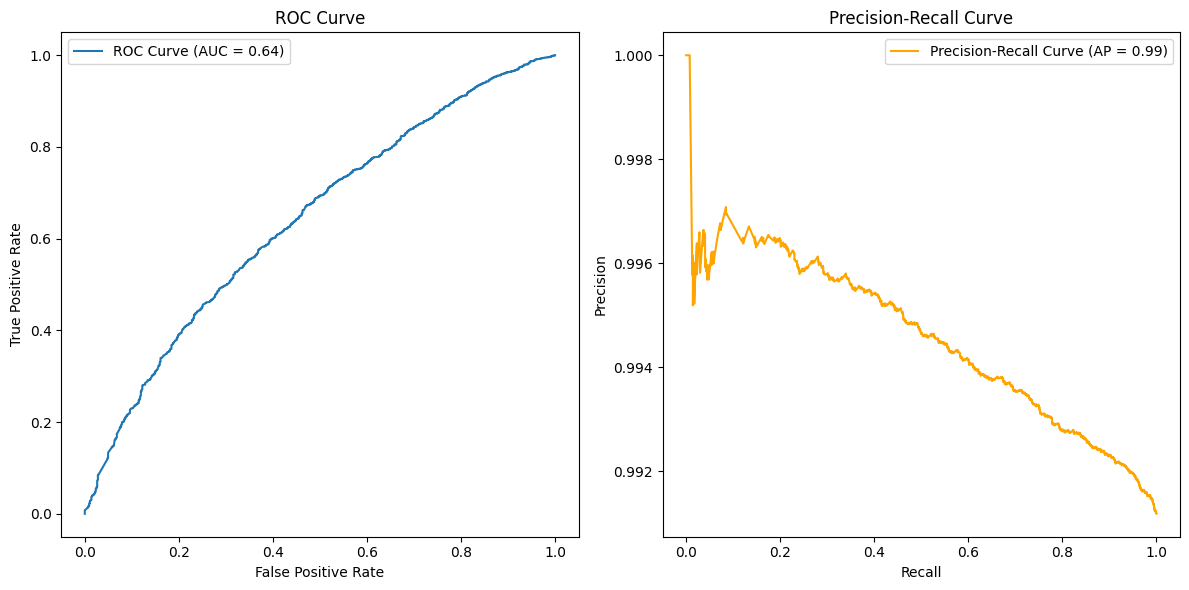

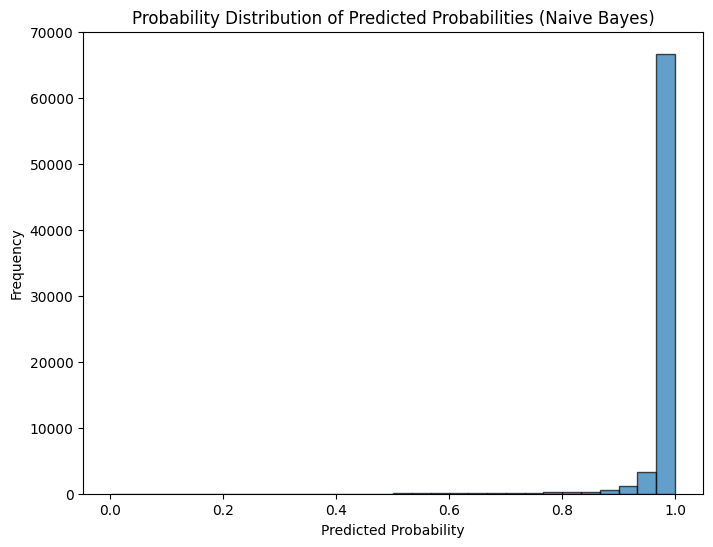


Reduced Feature Dataset (v2):

Accuracy: 0.9911826929638982

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       646
         1.0       0.99      1.00      1.00     72619

    accuracy                           0.99     73265
   macro avg       0.50      0.50      0.50     73265
weighted avg       0.98      0.99      0.99     73265


True Positive Rate: 1.00
True Negative Rate: 0.00

Confusion Matrix:
[[    0   646]
 [    0 72619]]

ROC AUC: 0.58

Average Precision: 0.99


C:\Users\kentv\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kentv\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kentv\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

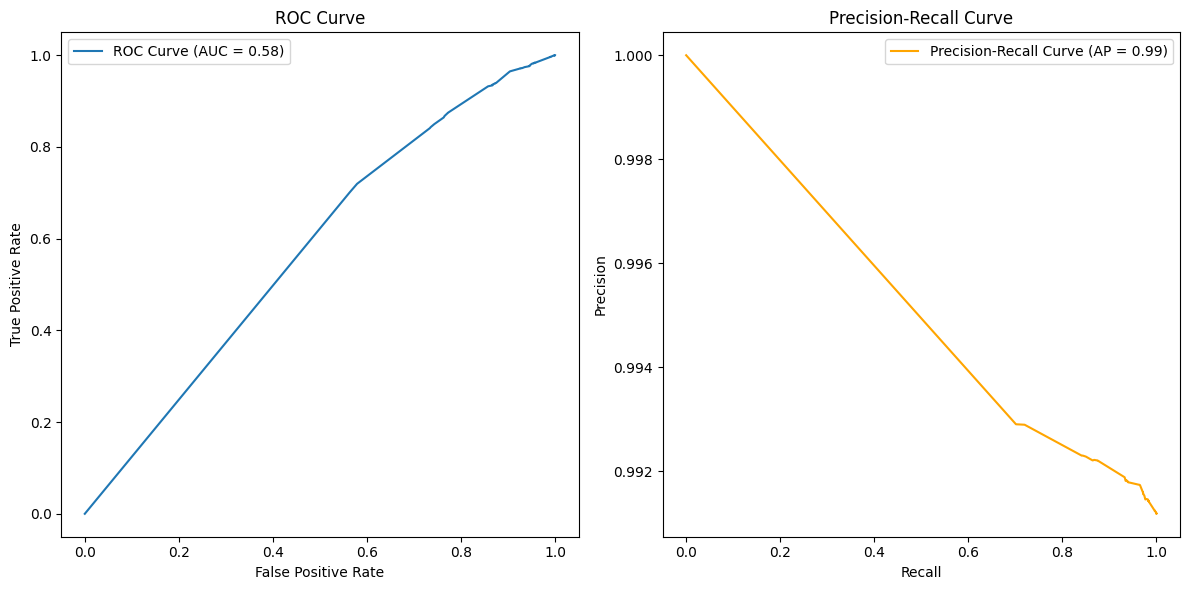

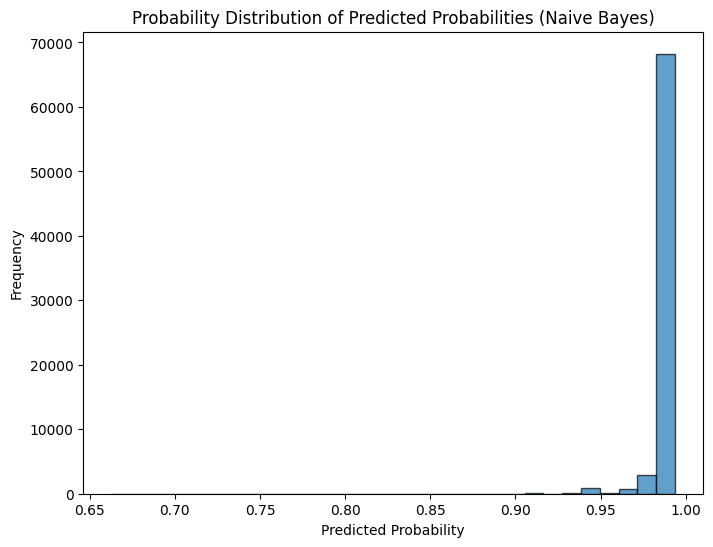

In [9]:
# Naive Bayes w/ NCL
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score, roc_curve,
    confusion_matrix, precision_recall_curve, average_precision_score
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

file_path_v1 = 'C:/Users/kentv/OneDrive/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv1.csv'
file_path_v2 = 'C:/Users/kentv/OneDrive/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv2.csv'
data_v1 = pd.read_csv(file_path_v1)  # Full feature dataset
data_v2 = pd.read_csv(file_path_v2)  # Reduced feature dataset

target_col = 'INF_LIVE'

def preprocess_and_split(data, target_col):
    data = data.drop(columns=['ID'], errors='ignore') 
    
    X = data.drop(columns=[target_col])
    y = data[target_col]
    
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=2003, stratify=y
    )
    
    return X_train, X_test, y_train, y_test

def apply_ncl(X_train, y_train):
    ncl = NeighbourhoodCleaningRule(sampling_strategy='auto')
    X_resampled, y_resampled = ncl.fit_resample(X_train, y_train)

    return X_resampled, y_resampled

def evaluate_and_print_metrics(y_test, y_test_pred, y_test_proba):
    # Accuracy
    print("\nAccuracy:", accuracy_score(y_test, y_test_pred))
    
    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    tn, fp, fn, tp = cm.ravel()
    print(f"\nTrue Positive Rate: {tp / (tp + fn):.2f}")
    print(f"True Negative Rate: {tn / (tn + fp):.2f}")
    
    print("\nConfusion Matrix:")
    print(cm)
    
    # ROC Curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
    auc = roc_auc_score(y_test, y_test_proba)
    print(f"\nROC AUC: {auc:.2f}")
    
    plt.figure(figsize=(12, 6)) 
    
    # ROC Curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    avg_precision = average_precision_score(y_test, y_test_proba)
    print(f"\nAverage Precision: {avg_precision:.2f}")
    
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f"Precision-Recall Curve (AP = {avg_precision:.2f})", color='orange')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()

    plt.tight_layout()  
    plt.show()

    # Probability Distribution Plot
    plt.figure(figsize=(8, 6))
    plt.hist(y_test_proba, bins=30, edgecolor='black', alpha=0.7)
    plt.title("Probability Distribution of Predicted Probabilities (Naive Bayes)")
    plt.xlabel("Predicted Probability")
    plt.ylabel("Frequency")
    plt.show()

def train_and_evaluate(X_train, X_test, y_train, y_test):
    # Train Bernoulli Naive Bayes 
    nb = BernoulliNB()
    nb.fit(X_train, y_train)

    y_test_pred = nb.predict(X_test)
    y_test_proba = nb.predict_proba(X_test)[:, 1]
    
    evaluate_and_print_metrics(y_test, y_test_pred, y_test_proba)

print("\nFull Feature Dataset (v1):")
X_train_full, X_test_full, y_train_full, y_test_full = preprocess_and_split(data_v1, target_col)
X_train_full_ncl, y_train_full_ncl = apply_ncl(X_train_full, y_train_full)
train_and_evaluate(X_train_full_ncl, X_test_full, y_train_full_ncl, y_test_full)

print("\nReduced Feature Dataset (v2):")
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = preprocess_and_split(data_v2, target_col)
X_train_reduced_ncl, y_train_reduced_ncl = apply_ncl(X_train_reduced, y_train_reduced)
train_and_evaluate(X_train_reduced_ncl, X_test_reduced, y_train_reduced_ncl, y_test_reduced)


Processing Full Feature Dataset (v1):

Accuracy: 0.6941923155667782

Classification Report:
              precision    recall  f1-score   support

         0.0       0.02      0.60      0.03       646
         1.0       0.99      0.70      0.82     72619

    accuracy                           0.69     73265
   macro avg       0.51      0.65      0.43     73265
weighted avg       0.99      0.69      0.81     73265


True Positive Rate: 0.70
True Negative Rate: 0.60

Confusion Matrix:
[[  385   261]
 [22144 50475]]

ROC AUC: 0.69

Average Precision: 1.00


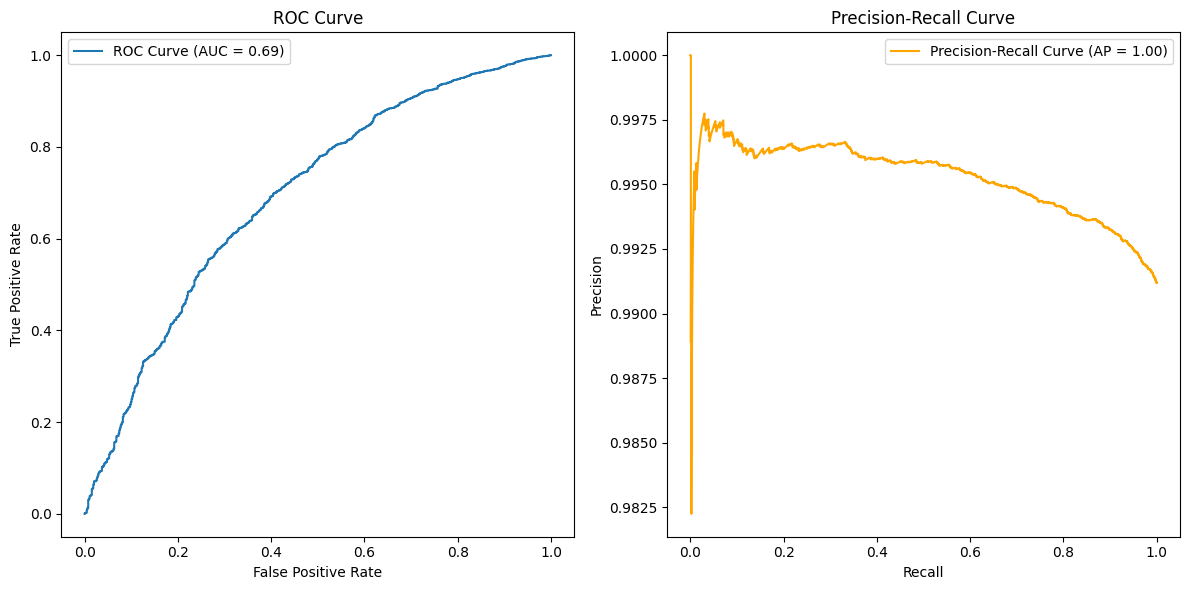

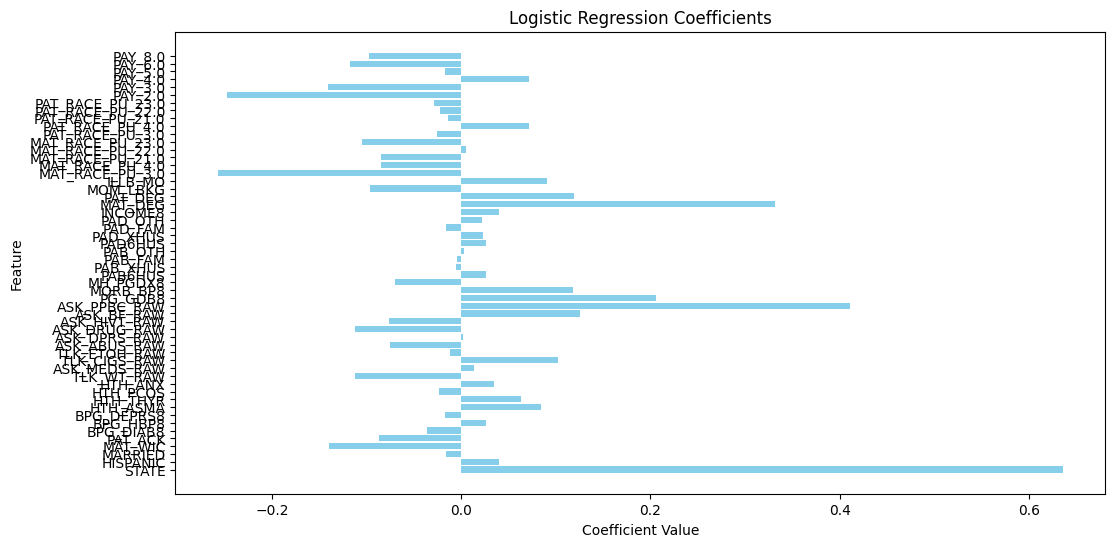

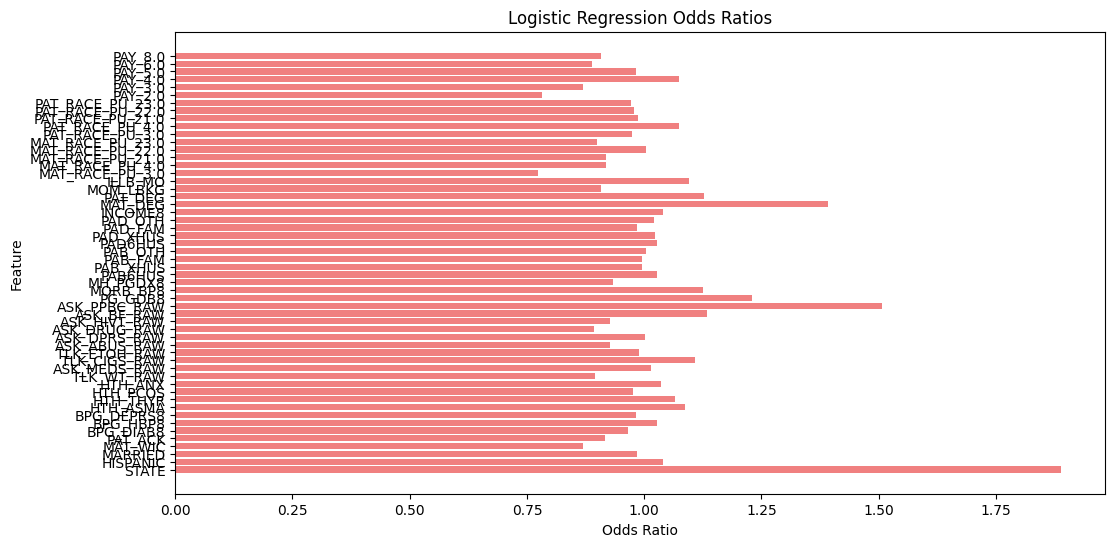


Processing Reduced Feature Dataset (v2):

Accuracy: 0.5700266157100935

Classification Report:
              precision    recall  f1-score   support

         0.0       0.01      0.61      0.02       646
         1.0       0.99      0.57      0.72     72619

    accuracy                           0.57     73265
   macro avg       0.50      0.59      0.37     73265
weighted avg       0.99      0.57      0.72     73265


True Positive Rate: 0.57
True Negative Rate: 0.61

Confusion Matrix:
[[  391   255]
 [31247 41372]]

ROC AUC: 0.62

Average Precision: 0.99


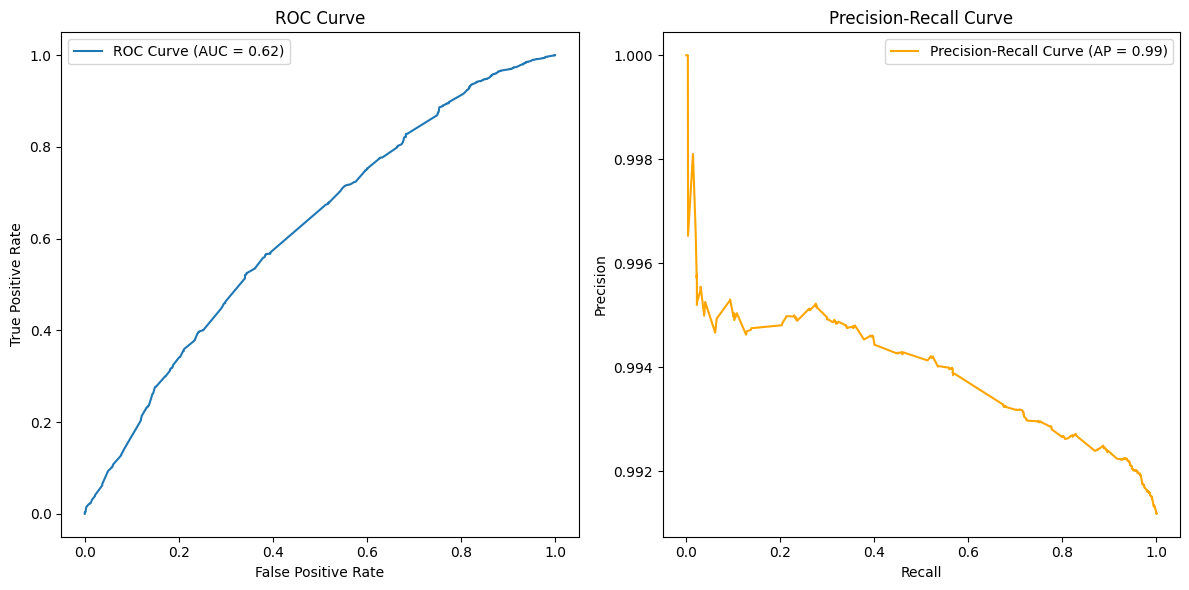

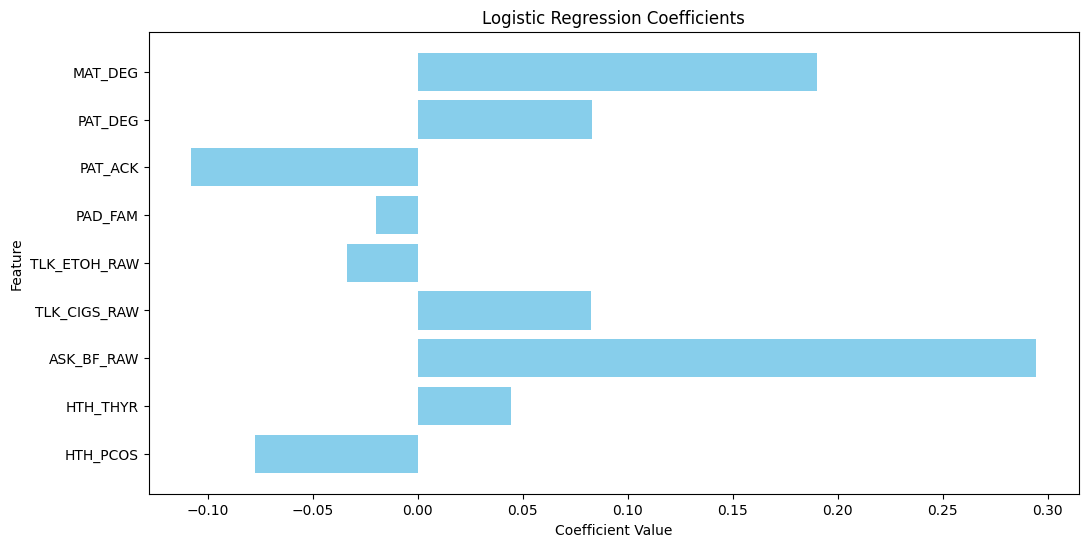

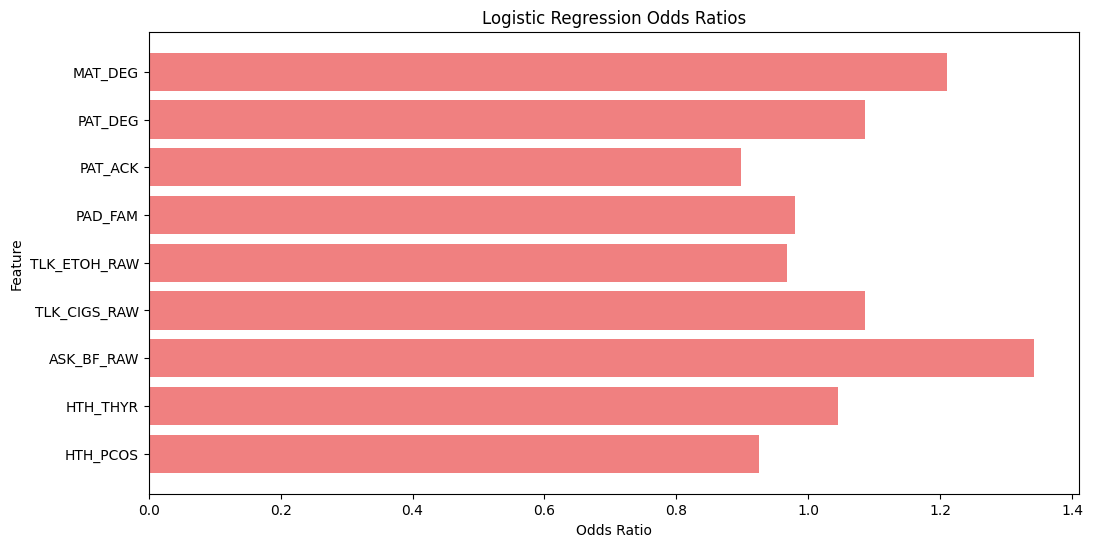

In [48]:
# Logistic Regression w/ SMOTE & Performance Metrics and Coefficients/Odds Ratios
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score, roc_curve,
    confusion_matrix, precision_recall_curve, average_precision_score
)
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

file_path_v1 = 'C:/Users/kentv/OneDrive/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv1.csv'
file_path_v2 = 'C:/Users/kentv/OneDrive/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv2.csv'
data_v1 = pd.read_csv(file_path_v1)  # Full feature dataset
data_v2 = pd.read_csv(file_path_v2)  # Reduced feature dataset

target_col = 'INF_LIVE'

def preprocess_and_split(data, target_col):
    data = data.drop(columns=['ID'], errors='ignore')  

    X = data.drop(columns=[target_col])
    y = data[target_col]
    
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=2003, stratify=y
    )
    
    return X_train, X_test, y_train, y_test

def apply_smote(X_train, y_train):
    smote = SMOTE(sampling_strategy='auto', random_state=2003)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    return X_resampled, y_resampled

def evaluate_and_print_metrics_lr(y_test, y_test_pred, y_test_proba, model, X_train):
    print("\nAccuracy:", accuracy_score(y_test, y_test_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))
    
    cm = confusion_matrix(y_test, y_test_pred)
    tn, fp, fn, tp = cm.ravel()
    print(f"\nTrue Positive Rate: {tp / (tp + fn):.2f}")
    print(f"True Negative Rate: {tn / (tn + fp):.2f}")
    
    print("\nConfusion Matrix:")
    print(cm)
    
    # ROC Curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
    auc = roc_auc_score(y_test, y_test_proba)
    print(f"\nROC AUC: {auc:.2f}")
    
    plt.figure(figsize=(12, 6)) 
    
    # ROC Curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    avg_precision = average_precision_score(y_test, y_test_proba)
    print(f"\nAverage Precision: {avg_precision:.2f}")
    
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f"Precision-Recall Curve (AP = {avg_precision:.2f})", color='orange')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()

    plt.tight_layout()  
    plt.show()

    # Coefficients and Odds Ratios
    coeffs = model.coef_[0]
    features = X_train.columns
    odds_ratios = np.exp(coeffs)  

    # Plotting Coefficients
    plt.figure(figsize=(12, 6))
    plt.barh(features, coeffs, color='skyblue')
    plt.title('Logistic Regression Coefficients')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.show()

    # Plotting Odds Ratios
    plt.figure(figsize=(12, 6))
    plt.barh(features, odds_ratios, color='lightcoral')
    plt.title('Logistic Regression Odds Ratios')
    plt.xlabel('Odds Ratio')
    plt.ylabel('Feature')
    plt.show()

def train_and_evaluate(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train Logistic Regression
    lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=2003)
    lr.fit(X_train_scaled, y_train)
    
    y_test_pred = lr.predict(X_test_scaled)
    y_test_proba = lr.predict_proba(X_test_scaled)[:, 1]
    
    evaluate_and_print_metrics_lr(y_test, y_test_pred, y_test_proba, lr, X_train)

print("\nFull Feature Dataset (v1):")
X_train_full, X_test_full, y_train_full, y_test_full = preprocess_and_split(data_v1, target_col)
X_train_full_smote, y_train_full_smote = apply_smote(X_train_full, y_train_full)
train_and_evaluate(X_train_full_smote, X_test_full, y_train_full_smote, y_test_full)

print("\nReduced Feature Dataset (v2):")
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = preprocess_and_split(data_v2, target_col)
X_train_reduced_smote, y_train_reduced_smote = apply_smote(X_train_reduced, y_train_reduced)
train_and_evaluate(X_train_reduced_smote, X_test_reduced, y_train_reduced_smote, y_test_reduced)



Full Feature Dataset (v1):

Accuracy: 0.694001228417389

Classification Report:
              precision    recall  f1-score   support

         0.0       0.02      0.60      0.03       646
         1.0       0.99      0.69      0.82     72619

    accuracy                           0.69     73265
   macro avg       0.51      0.65      0.43     73265
weighted avg       0.99      0.69      0.81     73265


True Positive Rate: 0.69
True Negative Rate: 0.60

Confusion Matrix:
[[  385   261]
 [22158 50461]]

ROC AUC: 0.69

Average Precision: 1.00


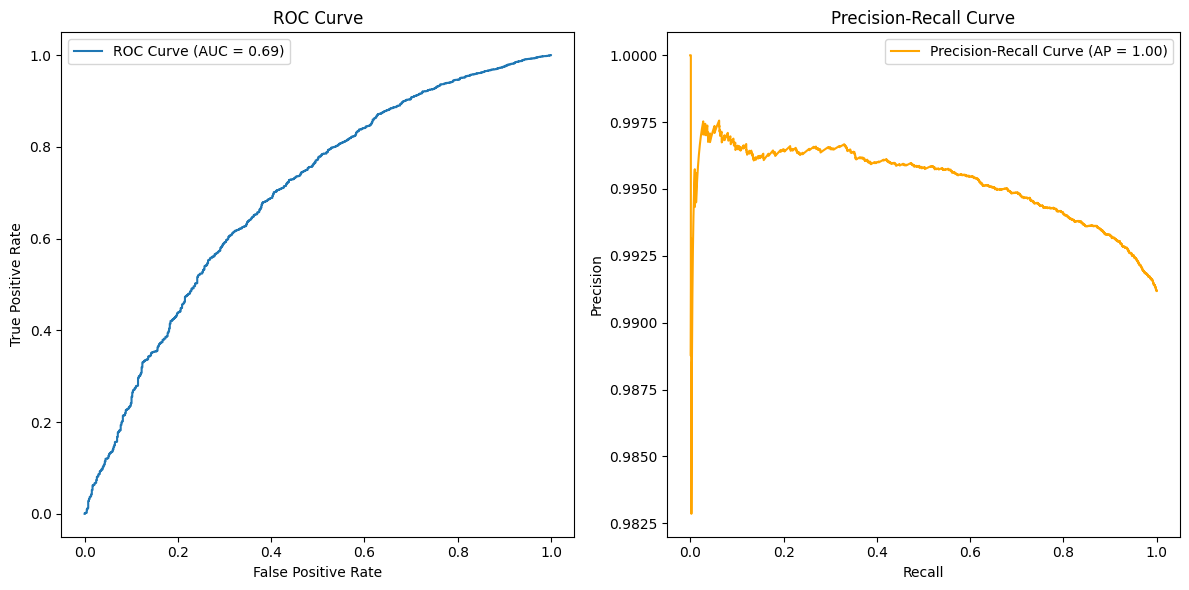

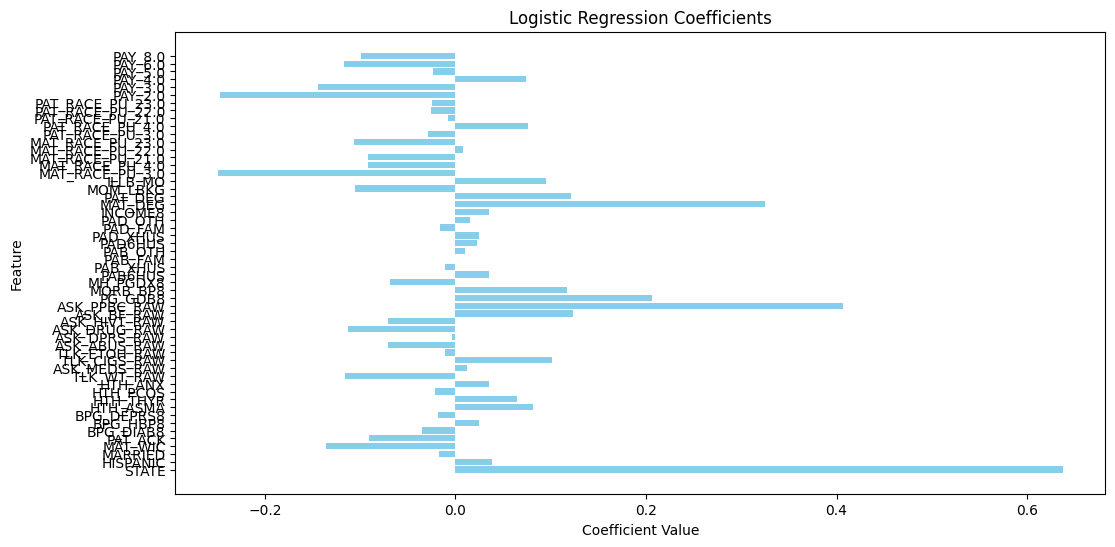

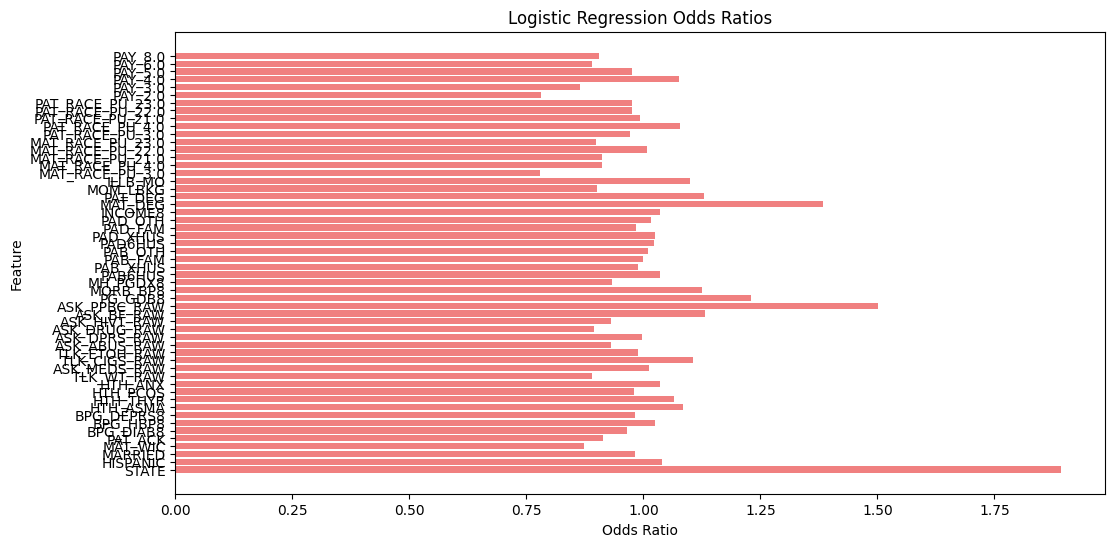


Reduced Feature Dataset (v2):

Accuracy: 0.5715553129052071

Classification Report:
              precision    recall  f1-score   support

         0.0       0.01      0.60      0.02       646
         1.0       0.99      0.57      0.73     72619

    accuracy                           0.57     73265
   macro avg       0.50      0.59      0.37     73265
weighted avg       0.99      0.57      0.72     73265


True Positive Rate: 0.57
True Negative Rate: 0.60

Confusion Matrix:
[[  389   257]
 [31133 41486]]

ROC AUC: 0.62

Average Precision: 0.99


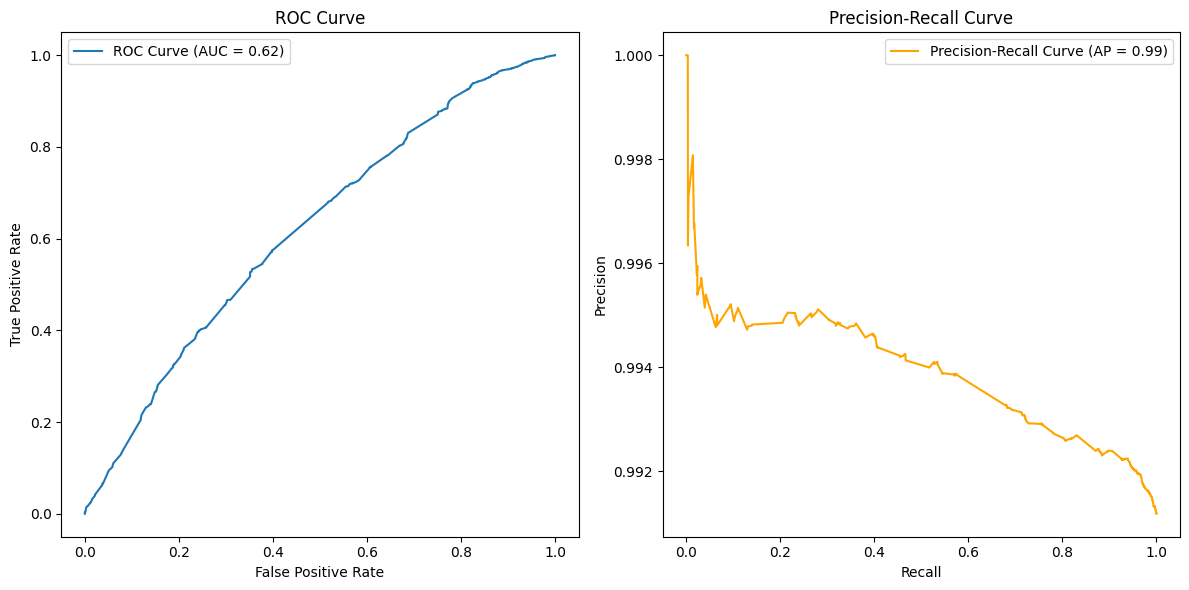

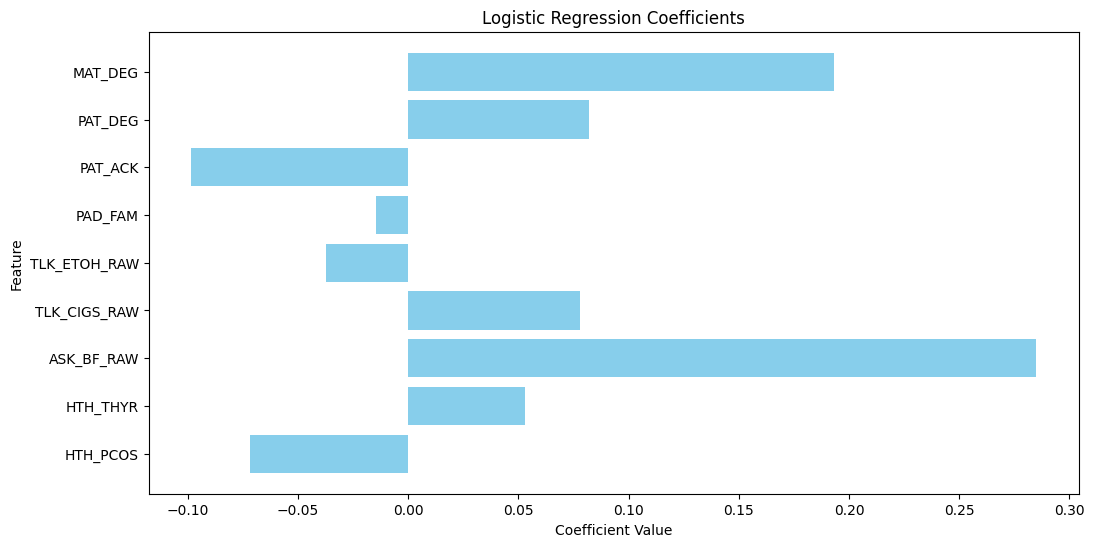

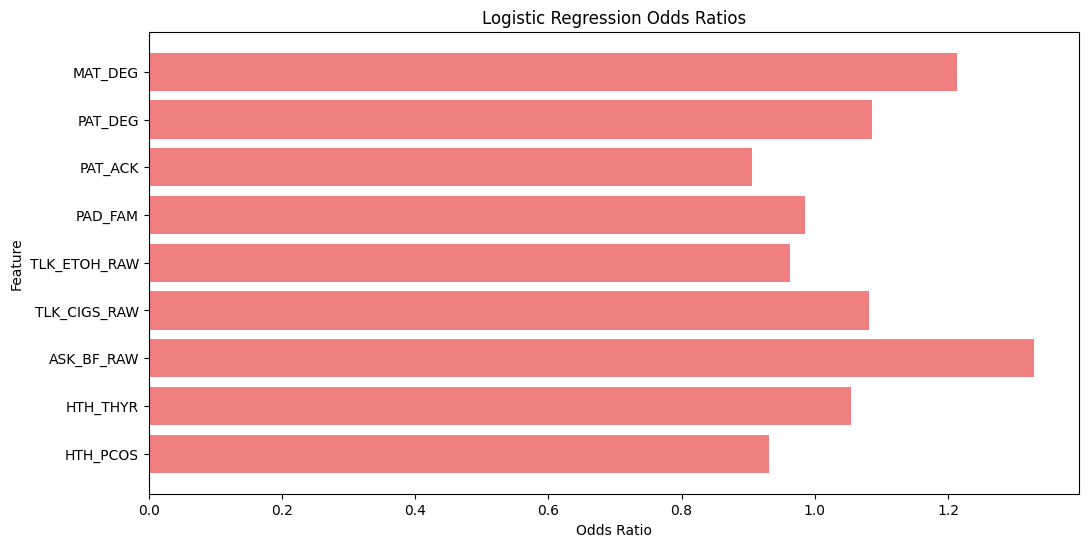

In [68]:
# Logistic Regression w/ ADAYSN
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score, roc_curve,
    confusion_matrix, precision_recall_curve, average_precision_score
)
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

file_path_v1 = 'C:/Users/kentv/OneDrive/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv1.csv'
file_path_v2 = 'C:/Users/kentv/OneDrive/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv2.csv'
data_v1 = pd.read_csv(file_path_v1)  # Full feature dataset
data_v2 = pd.read_csv(file_path_v2)  # Reduced feature dataset

target_col = 'INF_LIVE'

def preprocess_and_split(data, target_col):
    data = data.drop(columns=['ID'], errors='ignore')  

    X = data.drop(columns=[target_col])
    y = data[target_col]
    
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=2003, stratify=y
    )
    
    return X_train, X_test, y_train, y_test

def apply_adasyn(X_train, y_train):
    adasyn = ADASYN(sampling_strategy='minority', random_state=2003)
    X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)
    return X_resampled, y_resampled

def evaluate_and_print_metrics_lr(y_test, y_test_pred, y_test_proba, model, X_train):
    print("\nAccuracy:", accuracy_score(y_test, y_test_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))
    
    cm = confusion_matrix(y_test, y_test_pred)
    tn, fp, fn, tp = cm.ravel()
    print(f"\nTrue Positive Rate: {tp / (tp + fn):.2f}")
    print(f"True Negative Rate: {tn / (tn + fp):.2f}")
    
    print("\nConfusion Matrix:")
    print(cm)
    
    # ROC Curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
    auc = roc_auc_score(y_test, y_test_proba)
    print(f"\nROC AUC: {auc:.2f}")
    
    plt.figure(figsize=(12, 6)) 
    
    # ROC Curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    avg_precision = average_precision_score(y_test, y_test_proba)
    print(f"\nAverage Precision: {avg_precision:.2f}")
    
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f"Precision-Recall Curve (AP = {avg_precision:.2f})", color='orange')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()

    plt.tight_layout()  
    plt.show()

    # Coefficients and Odds Ratios
    coeffs = model.coef_[0]
    features = X_train.columns
    odds_ratios = np.exp(coeffs)  

    # Plotting Coefficients
    plt.figure(figsize=(12, 6))
    plt.barh(features, coeffs, color='skyblue')
    plt.title('Logistic Regression Coefficients')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.show()

    # Plotting Odds Ratios
    plt.figure(figsize=(12, 6))
    plt.barh(features, odds_ratios, color='lightcoral')
    plt.title('Logistic Regression Odds Ratios')
    plt.xlabel('Odds Ratio')
    plt.ylabel('Feature')
    plt.show()

def train_and_evaluate(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train Logistic Regression
    lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=2003)
    lr.fit(X_train_scaled, y_train)
    
    y_test_pred = lr.predict(X_test_scaled)
    y_test_proba = lr.predict_proba(X_test_scaled)[:, 1]
    
    evaluate_and_print_metrics_lr(y_test, y_test_pred, y_test_proba, lr, X_train)

print("\nFull Feature Dataset (v1):")
X_train_full, X_test_full, y_train_full, y_test_full = preprocess_and_split(data_v1, target_col)
X_train_full_adasyn, y_train_full_adasyn = apply_adasyn(X_train_full, y_train_full)
train_and_evaluate(X_train_full_adasyn, X_test_full, y_train_full_adasyn, y_test_full)

print("\nReduced Feature Dataset (v2):")
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = preprocess_and_split(data_v2, target_col)
X_train_reduced_adasyn, y_train_reduced_adasyn = apply_adasyn(X_train_reduced, y_train_reduced)
train_and_evaluate(X_train_reduced_adasyn, X_test_reduced, y_train_reduced_adasyn, y_test_reduced)


Full Feature Dataset (v1):

Accuracy: 0.6867808639868969

Classification Report:
              precision    recall  f1-score   support

         0.0       0.02      0.61      0.03       646
         1.0       1.00      0.69      0.81     72619

    accuracy                           0.69     73265
   macro avg       0.51      0.65      0.42     73265
weighted avg       0.99      0.69      0.81     73265


True Positive Rate: 0.69
True Negative Rate: 0.61

Confusion Matrix:
[[  396   250]
 [22698 49921]]

ROC AUC: 0.71

Average Precision: 1.00


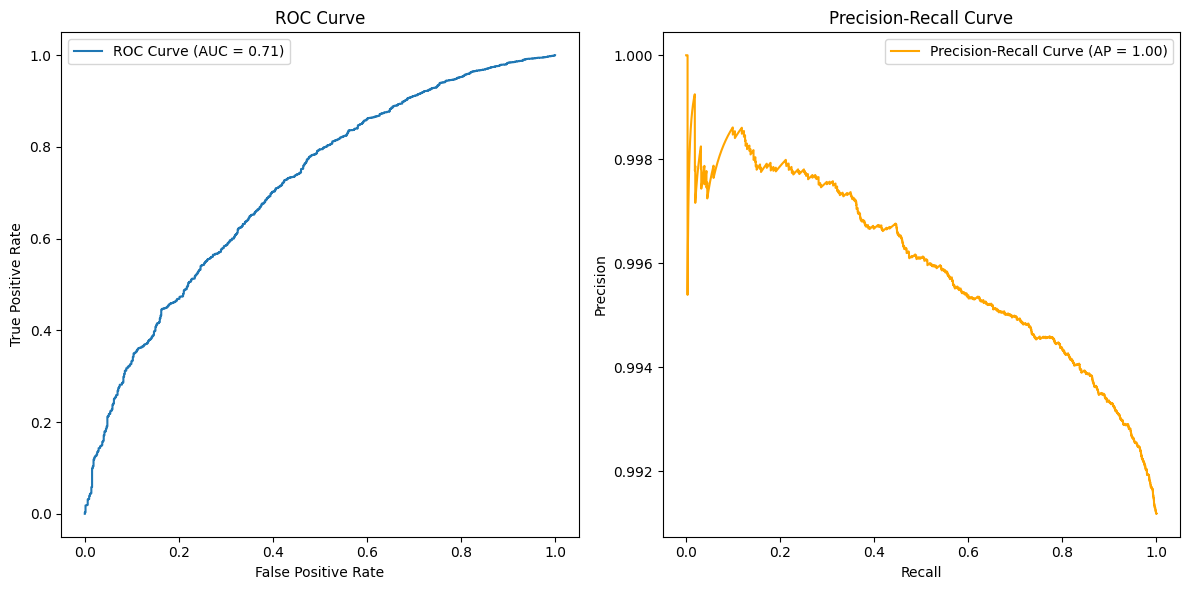

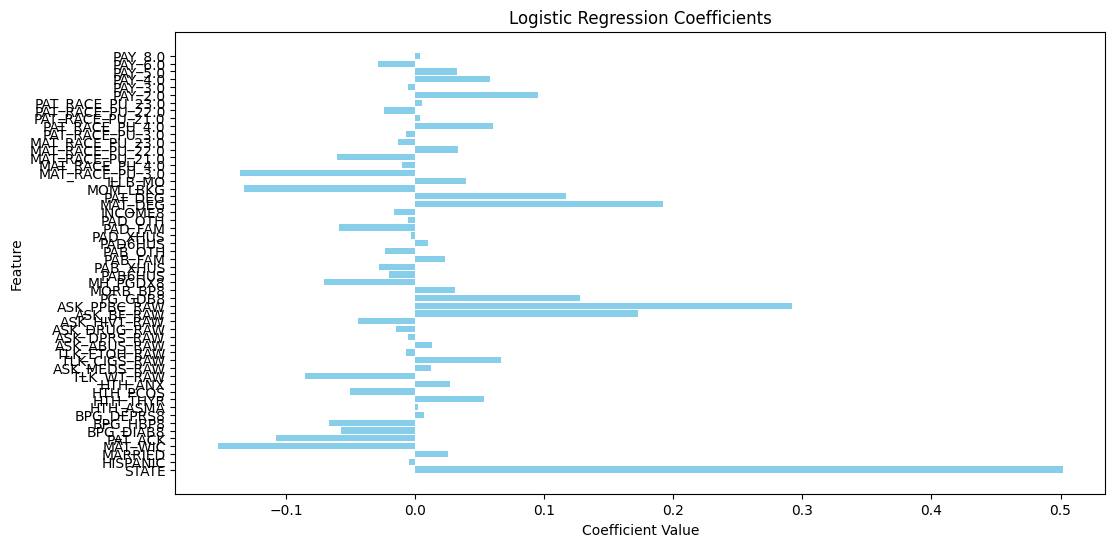

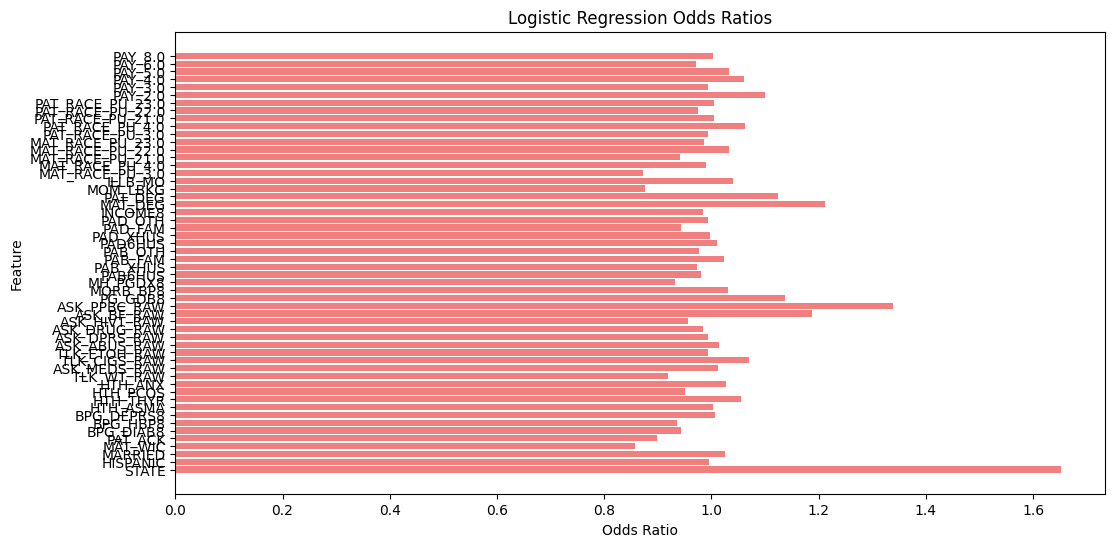


Reduced Feature Dataset (v2):

Accuracy: 0.658513614959394

Classification Report:
              precision    recall  f1-score   support

         0.0       0.01      0.48      0.02       646
         1.0       0.99      0.66      0.79     72619

    accuracy                           0.66     73265
   macro avg       0.50      0.57      0.41     73265
weighted avg       0.98      0.66      0.79     73265


True Positive Rate: 0.66
True Negative Rate: 0.48

Confusion Matrix:
[[  309   337]
 [24682 47937]]

ROC AUC: 0.61

Average Precision: 0.99


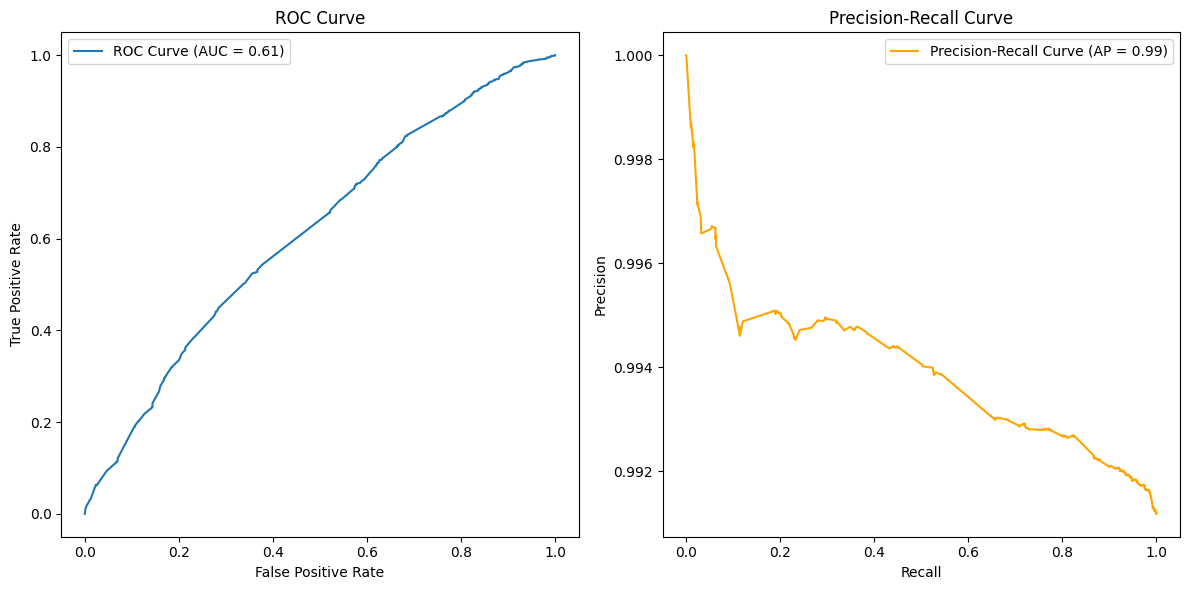

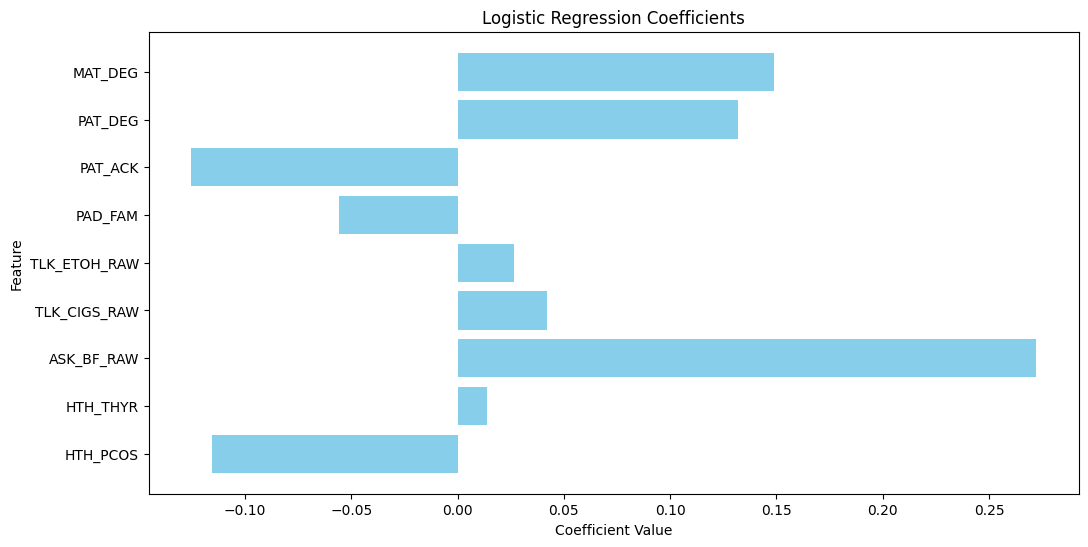

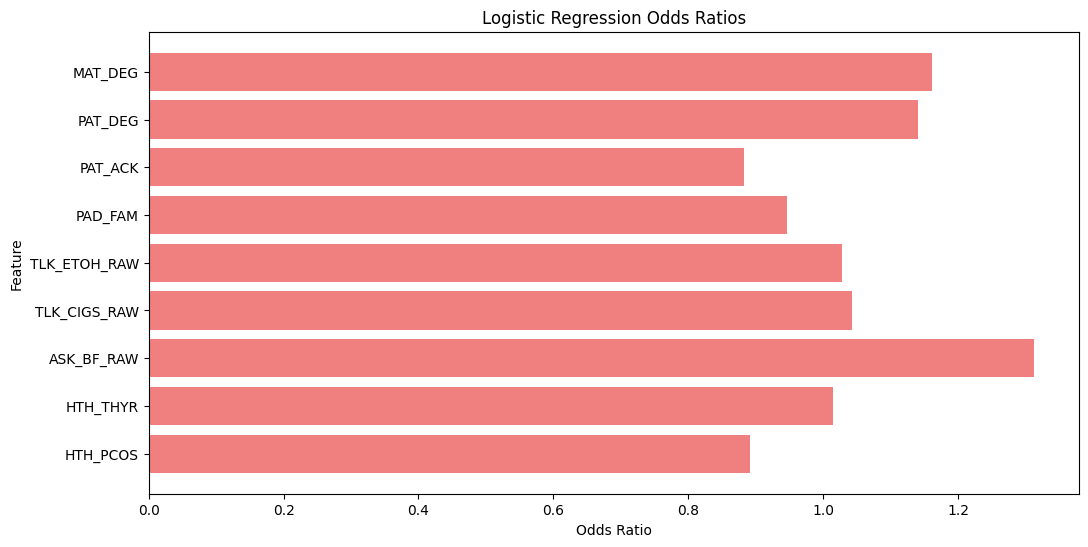

In [8]:
# Logistic Regression w/ NCL
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score, roc_curve,
    confusion_matrix, precision_recall_curve, average_precision_score
)
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

file_path_v1 = 'C:/Users/kentv/OneDrive/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv1.csv'
file_path_v2 = 'C:/Users/kentv/OneDrive/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv2.csv'
data_v1 = pd.read_csv(file_path_v1)  # Full feature dataset
data_v2 = pd.read_csv(file_path_v2)  # Reduced feature dataset

target_col = 'INF_LIVE'

def preprocess_and_split(data, target_col):
    data = data.drop(columns=['ID'], errors='ignore')  

    X = data.drop(columns=[target_col])
    y = data[target_col]
    
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=2003, stratify=y
    )
    
    return X_train, X_test, y_train, y_test

def apply_ncl(X_train, y_train):
    ncl = NeighbourhoodCleaningRule(sampling_strategy='auto')
    X_resampled, y_resampled = ncl.fit_resample(X_train, y_train)
    return X_resampled, y_resampled

def evaluate_and_print_metrics_lr(y_test, y_test_pred, y_test_proba, model, X_train):
    print("\nAccuracy:", accuracy_score(y_test, y_test_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))
    
    cm = confusion_matrix(y_test, y_test_pred)
    tn, fp, fn, tp = cm.ravel()
    print(f"\nTrue Positive Rate: {tp / (tp + fn):.2f}")
    print(f"True Negative Rate: {tn / (tn + fp):.2f}")
    
    print("\nConfusion Matrix:")
    print(cm)
    
    # ROC Curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
    auc = roc_auc_score(y_test, y_test_proba)
    print(f"\nROC AUC: {auc:.2f}")
    
    plt.figure(figsize=(12, 6)) 
    
    # ROC Curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    avg_precision = average_precision_score(y_test, y_test_proba)
    print(f"\nAverage Precision: {avg_precision:.2f}")
    
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f"Precision-Recall Curve (AP = {avg_precision:.2f})", color='orange')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()

    plt.tight_layout()  
    plt.show()

    # Coefficients and Odds Ratios
    coeffs = model.coef_[0]
    features = X_train.columns
    odds_ratios = np.exp(coeffs)  

    # Plotting Coefficients
    plt.figure(figsize=(12, 6))
    plt.barh(features, coeffs, color='skyblue')
    plt.title('Logistic Regression Coefficients')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.show()

    # Plotting Odds Ratios
    plt.figure(figsize=(12, 6))
    plt.barh(features, odds_ratios, color='lightcoral')
    plt.title('Logistic Regression Odds Ratios')
    plt.xlabel('Odds Ratio')
    plt.ylabel('Feature')
    plt.show()

def train_and_evaluate(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train Logistic Regression
    lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=2003)
    lr.fit(X_train_scaled, y_train)
    
    y_test_pred = lr.predict(X_test_scaled)
    y_test_proba = lr.predict_proba(X_test_scaled)[:, 1]
    
    evaluate_and_print_metrics_lr(y_test, y_test_pred, y_test_proba, lr, X_train)

print("\nFull Feature Dataset (v1):")
X_train_full, X_test_full, y_train_full, y_test_full = preprocess_and_split(data_v1, target_col)
X_train_full_ncl, y_train_full_ncl = apply_ncl(X_train_full, y_train_full)
train_and_evaluate(X_train_full_ncl, X_test_full, y_train_full_ncl, y_test_full)

print("\nReduced Feature Dataset (v2):")
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = preprocess_and_split(data_v2, target_col)
X_train_reduced_ncl, y_train_reduced_ncl = apply_ncl(X_train_reduced, y_train_reduced)
train_and_evaluate(X_train_reduced_ncl, X_test_reduced, y_train_reduced_ncl, y_test_reduced)


Processing Full Feature Dataset (v1):

Accuracy: 0.9910189039787074

Classification Report:
              precision    recall  f1-score   support

         0.0       0.20      0.01      0.01       646
         1.0       0.99      1.00      1.00     72619

    accuracy                           0.99     73265
   macro avg       0.60      0.50      0.50     73265
weighted avg       0.98      0.99      0.99     73265


True Positive Rate: 1.00
True Negative Rate: 0.01

Confusion Matrix:
[[    4   642]
 [   16 72603]]

ROC AUC: 0.62

Average Precision: 0.99


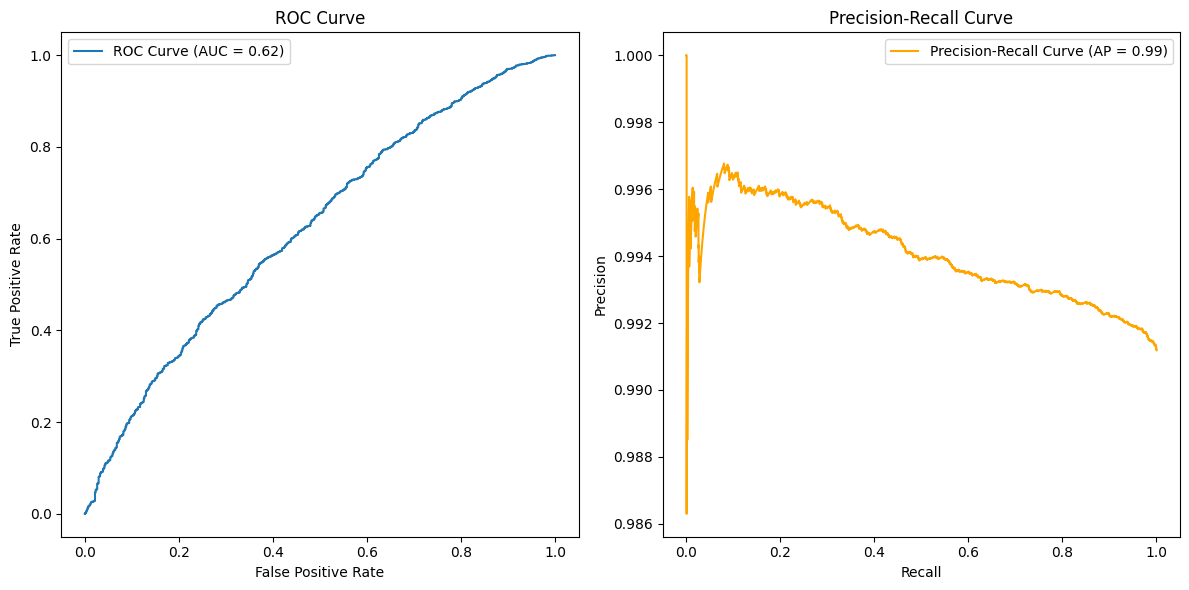

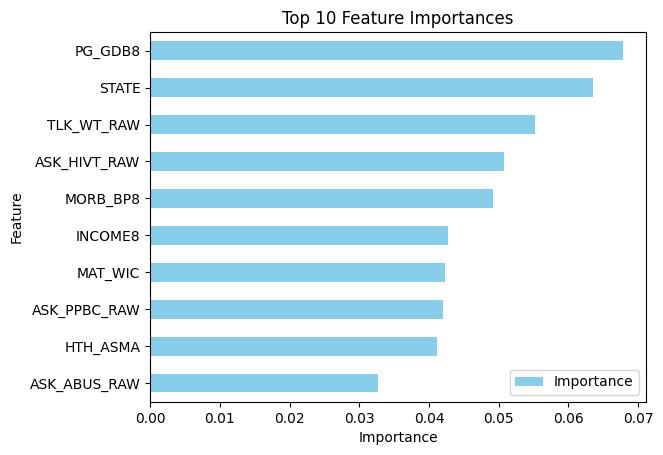


Processing Reduced Feature Dataset (v2):

Accuracy: 0.7183102436361155

Classification Report:
              precision    recall  f1-score   support

         0.0       0.01      0.40      0.02       646
         1.0       0.99      0.72      0.84     72619

    accuracy                           0.72     73265
   macro avg       0.50      0.56      0.43     73265
weighted avg       0.98      0.72      0.83     73265


True Positive Rate: 0.72
True Negative Rate: 0.40

Confusion Matrix:
[[  259   387]
 [20251 52368]]

ROC AUC: 0.57

Average Precision: 0.99


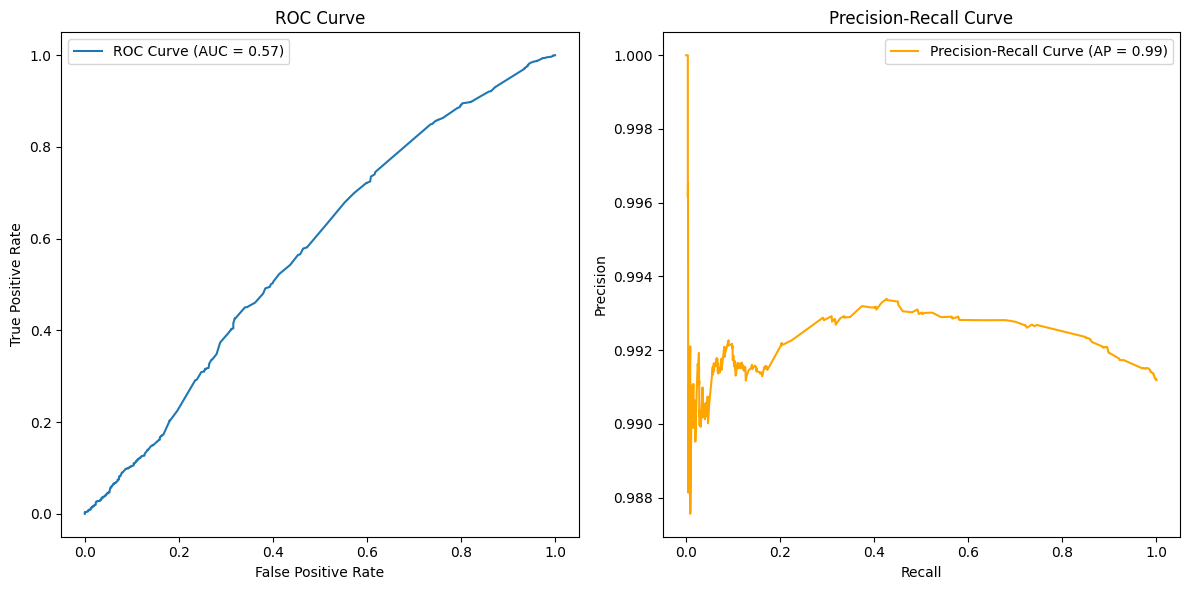

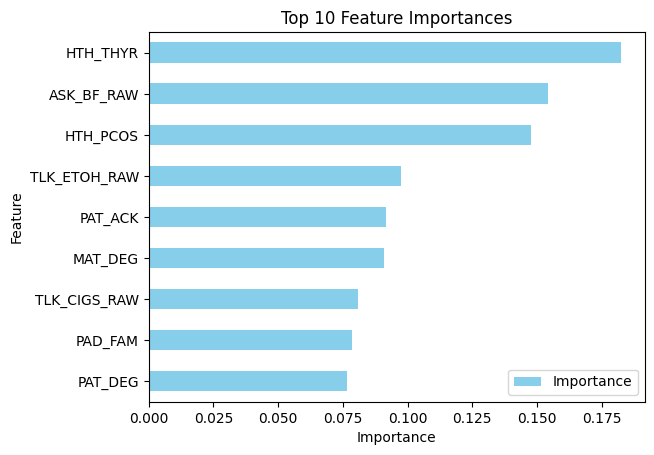

In [50]:
#XGBoost w/ SMOTE & Performance Metrics & Feature Importance
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier  
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score, roc_curve,
    confusion_matrix, precision_recall_curve, average_precision_score
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

file_path_v1 = 'C:/Users/kentv/OneDrive/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv1.csv'
file_path_v2 = 'C:/Users/kentv/OneDrive/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv2.csv'
data_v1 = pd.read_csv(file_path_v1)  # Full feature dataset
data_v2 = pd.read_csv(file_path_v2)  # Reduced feature dataset

target_col = 'INF_LIVE'

def preprocess_and_split(data, target_col):
    data = data.drop(columns=['ID'], errors='ignore') 
    
    X = data.drop(columns=[target_col])
    y = data[target_col]
    
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=2003, stratify=y
    )
    
    return X_train, X_test, y_train, y_test

def apply_smote(X_train, y_train):
    smote = SMOTE(sampling_strategy='auto', random_state=2003)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    return X_resampled, y_resampled

def evaluate_and_print_metrics(y_test, y_test_pred, y_test_proba, model, X_train):
    print("\nAccuracy:", accuracy_score(y_test, y_test_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))
    
    cm = confusion_matrix(y_test, y_test_pred)
    tn, fp, fn, tp = cm.ravel()
    print(f"\nTrue Positive Rate: {tp / (tp + fn):.2f}")
    print(f"True Negative Rate: {tn / (tn + fp):.2f}")
    
    print("\nConfusion Matrix:")
    print(cm)
    
    # ROC Curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
    auc = roc_auc_score(y_test, y_test_proba)
    print(f"\nROC AUC: {auc:.2f}")
    
    plt.figure(figsize=(12, 6)) 
    
    # ROC Curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    avg_precision = average_precision_score(y_test, y_test_proba)
    print(f"\nAverage Precision: {avg_precision:.2f}")
    
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f"Precision-Recall Curve (AP = {avg_precision:.2f})", color='orange')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()

    plt.tight_layout()  
    plt.show()

    # Feature Importance Plot 
    feature_importance = model.feature_importances_
    feature_names = X_train.columns
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importance
    }).sort_values(by='Importance', ascending=False)
    
    top_10_features = feature_importance_df.head(10)
    top_10_features.plot(kind='barh', x='Feature', y='Importance', title='Top 10 Feature Importances', color='skyblue')
    plt.gca().invert_yaxis()
    plt.xlabel('Importance')
    plt.show()

def train_and_evaluate(X_train, X_test, y_train, y_test):
    majority_class_count = sum(y_train == 1)
    minority_class_count = sum(y_train == 0)
    scale_pos_weight = majority_class_count / minority_class_count

    # Train XGBoost
    xgb = XGBClassifier(
        n_estimators=200,
        learning_rate=0.1,
        min_child_weight=5,
        gamma=1,
        n_jobs=2,
        random_state=2003,
        eval_metric='auc'
    )
    xgb.fit(X_train, y_train)
    
    y_train_pred = xgb.predict(X_train)
    y_test_pred = xgb.predict(X_test)
    y_test_proba = xgb.predict_proba(X_test)[:, 1]  
    
    evaluate_and_print_metrics(y_test, y_test_pred, y_test_proba, xgb, X_train)

print("\nFull Feature Dataset (v1):")
X_train_full, X_test_full, y_train_full, y_test_full = preprocess_and_split(data_v1, target_col)
X_train_full_smote, y_train_full_smote = apply_smote(X_train_full, y_train_full)
train_and_evaluate(X_train_full_smote, X_test_full, y_train_full_smote, y_test_full)

print("\nReduced Feature Dataset (v2):")
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = preprocess_and_split(data_v2, target_col)
X_train_reduced_smote, y_train_reduced_smote = apply_smote(X_train_reduced, y_train_reduced)
train_and_evaluate(X_train_reduced_smote, X_test_reduced, y_train_reduced_smote, y_test_reduced)



Full Feature Dataset (v1):

Accuracy: 0.9909370094861121

Classification Report:
              precision    recall  f1-score   support

         0.0       0.09      0.00      0.01       646
         1.0       0.99      1.00      1.00     72619

    accuracy                           0.99     73265
   macro avg       0.54      0.50      0.50     73265
weighted avg       0.98      0.99      0.99     73265


True Positive Rate: 1.00
True Negative Rate: 0.00

Confusion Matrix:
[[    2   644]
 [   20 72599]]

ROC AUC: 0.62

Average Precision: 0.99


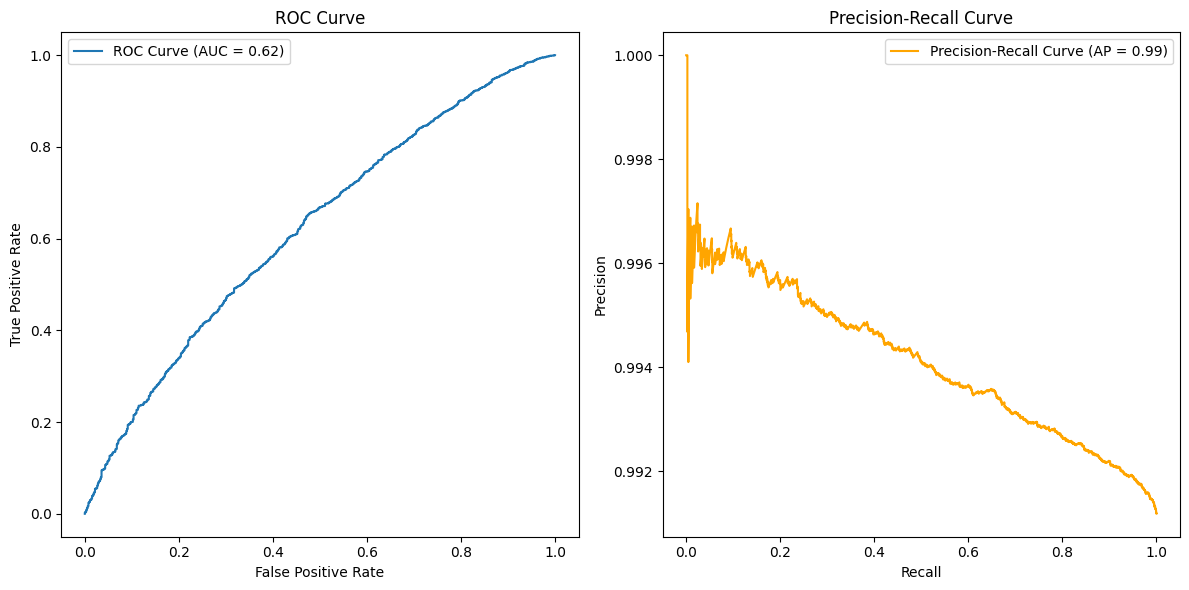

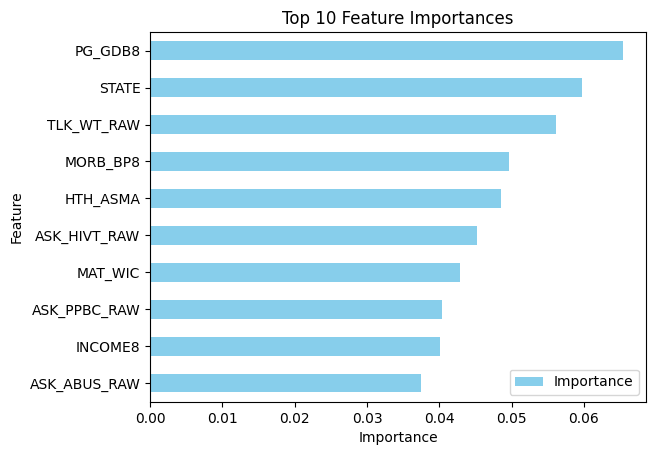


Reduced Feature Dataset (v2):

Accuracy: 0.7178325257626424

Classification Report:
              precision    recall  f1-score   support

         0.0       0.01      0.41      0.02       646
         1.0       0.99      0.72      0.84     72619

    accuracy                           0.72     73265
   macro avg       0.50      0.56      0.43     73265
weighted avg       0.98      0.72      0.83     73265


True Positive Rate: 0.72
True Negative Rate: 0.41

Confusion Matrix:
[[  263   383]
 [20290 52329]]

ROC AUC: 0.57

Average Precision: 0.99


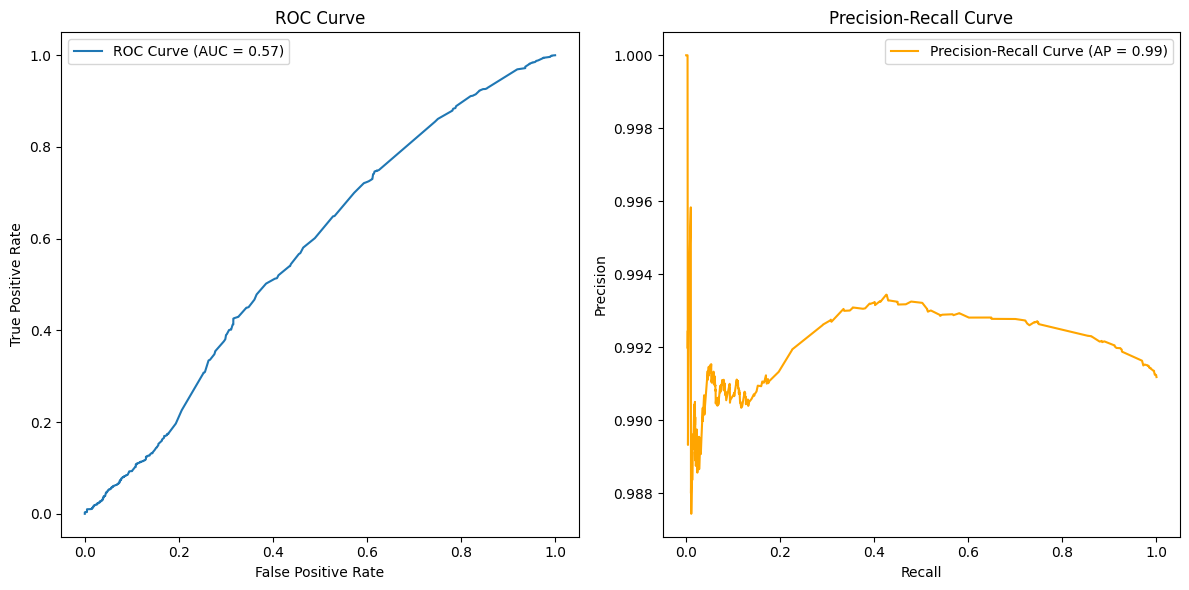

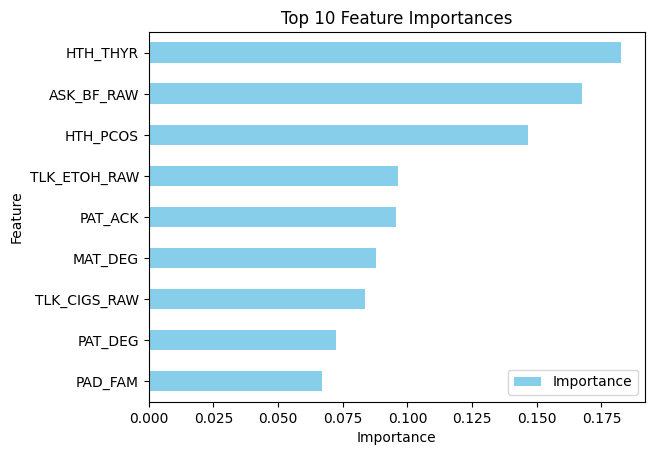

In [70]:
#XGBoost w/ ADAYSN
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier  
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score, roc_curve,
    confusion_matrix, precision_recall_curve, average_precision_score
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

file_path_v1 = 'C:/Users/kentv/OneDrive/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv1.csv'
file_path_v2 = 'C:/Users/kentv/OneDrive/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv2.csv'
data_v1 = pd.read_csv(file_path_v1)  # Full feature dataset
data_v2 = pd.read_csv(file_path_v2)  # Reduced feature dataset

target_col = 'INF_LIVE'

def preprocess_and_split(data, target_col):
    data = data.drop(columns=['ID'], errors='ignore') 
    
    X = data.drop(columns=[target_col])
    y = data[target_col]
    
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=2003, stratify=y
    )
    
    return X_train, X_test, y_train, y_test

def apply_adasyn(X_train, y_train):
    adasyn = ADASYN(sampling_strategy='minority', random_state=2003)
    X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)
    return X_resampled, y_resampled

def evaluate_and_print_metrics(y_test, y_test_pred, y_test_proba, model, X_train):
    print("\nAccuracy:", accuracy_score(y_test, y_test_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))
    
    cm = confusion_matrix(y_test, y_test_pred)
    tn, fp, fn, tp = cm.ravel()
    print(f"\nTrue Positive Rate: {tp / (tp + fn):.2f}")
    print(f"True Negative Rate: {tn / (tn + fp):.2f}")
    
    print("\nConfusion Matrix:")
    print(cm)
    
    # ROC Curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
    auc = roc_auc_score(y_test, y_test_proba)
    print(f"\nROC AUC: {auc:.2f}")
    
    plt.figure(figsize=(12, 6)) 
    
    # ROC Curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    avg_precision = average_precision_score(y_test, y_test_proba)
    print(f"\nAverage Precision: {avg_precision:.2f}")
    
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f"Precision-Recall Curve (AP = {avg_precision:.2f})", color='orange')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()

    plt.tight_layout()  
    plt.show()

    # Feature Importance Plot 
    feature_importance = model.feature_importances_
    feature_names = X_train.columns
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importance
    }).sort_values(by='Importance', ascending=False)
    
    top_10_features = feature_importance_df.head(10)
    top_10_features.plot(kind='barh', x='Feature', y='Importance', title='Top 10 Feature Importances', color='skyblue')
    plt.gca().invert_yaxis()
    plt.xlabel('Importance')
    plt.show()

def train_and_evaluate(X_train, X_test, y_train, y_test):
    majority_class_count = sum(y_train == 1)
    minority_class_count = sum(y_train == 0)
    scale_pos_weight = majority_class_count / minority_class_count

    # Train XGBoost
    xgb = XGBClassifier(
        n_estimators=200,
        learning_rate=0.1,
        min_child_weight=5,
        gamma=1,
        n_jobs=2,
        random_state=2003,
        eval_metric='auc'
    )
    xgb.fit(X_train, y_train)
    
    y_train_pred = xgb.predict(X_train)
    y_test_pred = xgb.predict(X_test)
    y_test_proba = xgb.predict_proba(X_test)[:, 1]  
    
    evaluate_and_print_metrics(y_test, y_test_pred, y_test_proba, xgb, X_train)

print("\nFull Feature Dataset (v1):")
X_train_full, X_test_full, y_train_full, y_test_full = preprocess_and_split(data_v1, target_col)
X_train_full_adasyn, y_train_full_adasyn = apply_adasyn(X_train_full, y_train_full)
train_and_evaluate(X_train_full_adasyn, X_test_full, y_train_full_adasyn, y_test_full)

print("\nReduced Feature Dataset (v2):")
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = preprocess_and_split(data_v2, target_col)
X_train_reduced_adasyn, y_train_reduced_adasyn = apply_adasyn(X_train_reduced, y_train_reduced)
train_and_evaluate(X_train_reduced_adasyn, X_test_reduced, y_train_reduced_adasyn, y_test_reduced)


Full Feature Dataset (v1):

Accuracy: 0.9911826929638982

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       646
         1.0       0.99      1.00      1.00     72619

    accuracy                           0.99     73265
   macro avg       0.50      0.50      0.50     73265
weighted avg       0.98      0.99      0.99     73265


True Positive Rate: 1.00
True Negative Rate: 0.00

Confusion Matrix:
[[    0   646]
 [    0 72619]]

ROC AUC: 0.72

Average Precision: 1.00


C:\Users\kentv\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kentv\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kentv\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

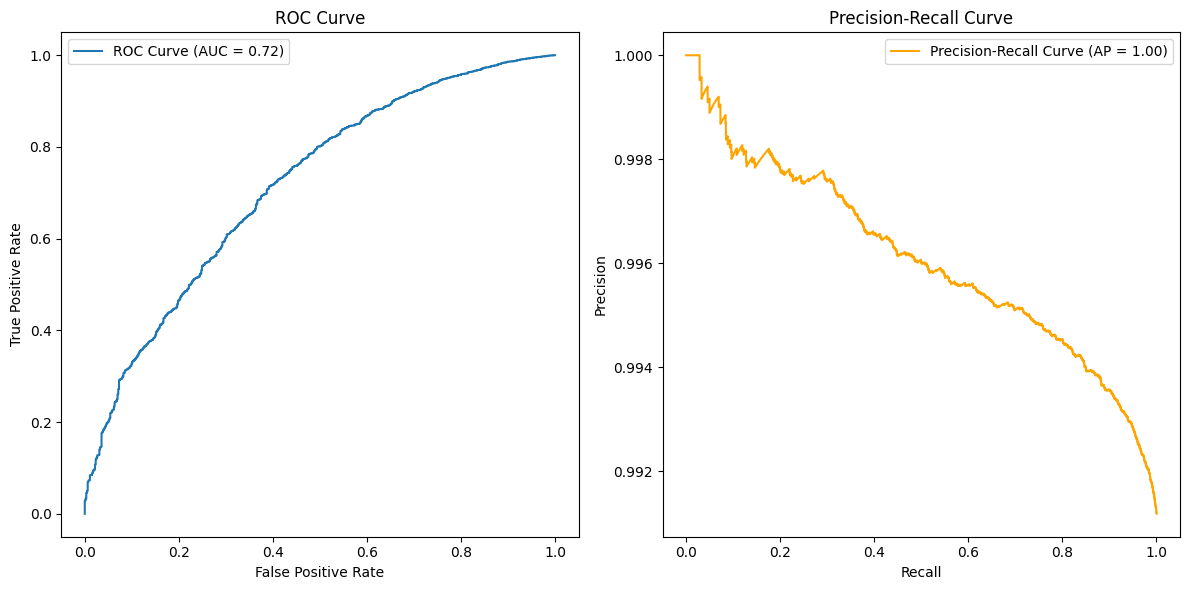

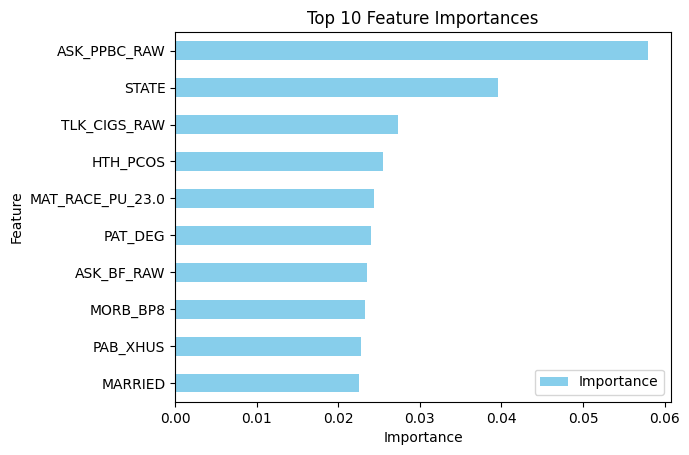


Reduced Feature Dataset (v2):

Accuracy: 0.9911826929638982

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       646
         1.0       0.99      1.00      1.00     72619

    accuracy                           0.99     73265
   macro avg       0.50      0.50      0.50     73265
weighted avg       0.98      0.99      0.99     73265


True Positive Rate: 1.00
True Negative Rate: 0.00

Confusion Matrix:
[[    0   646]
 [    0 72619]]

ROC AUC: 0.62

Average Precision: 0.99


C:\Users\kentv\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kentv\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kentv\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

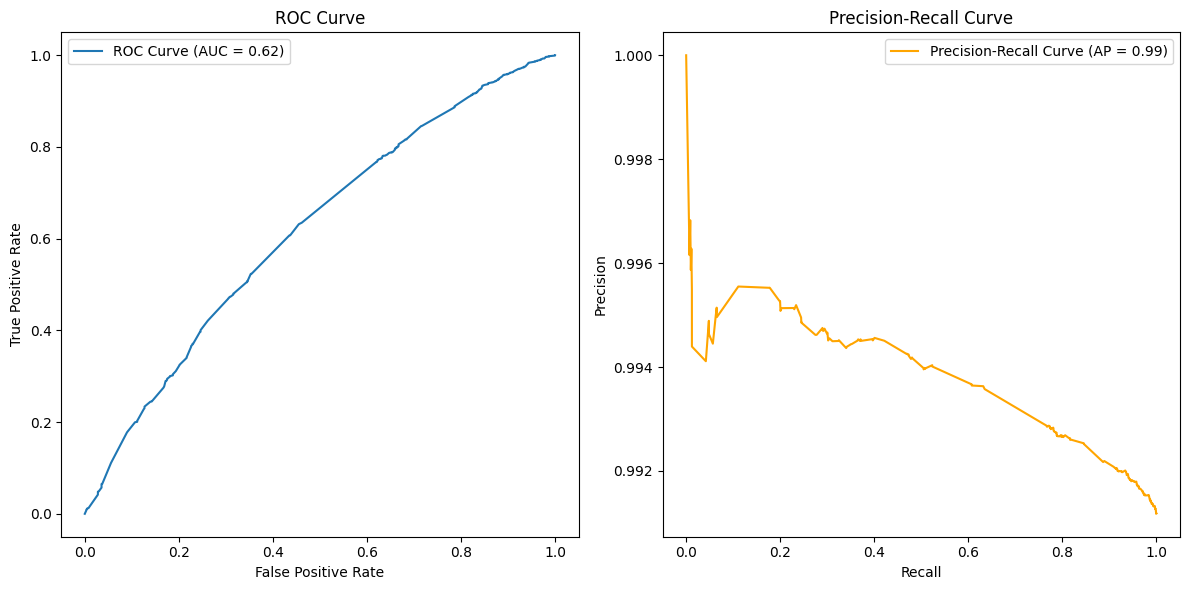

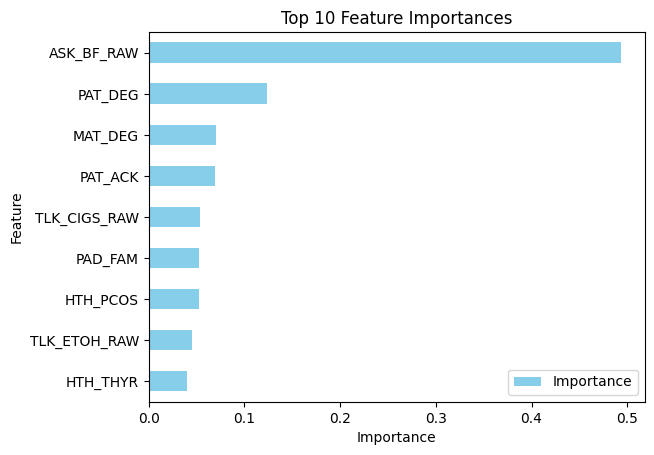

In [11]:
#XGBoost w/ NCL
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier  
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score, roc_curve,
    confusion_matrix, precision_recall_curve, average_precision_score
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

file_path_v1 = 'C:/Users/kentv/OneDrive/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv1.csv'
file_path_v2 = 'C:/Users/kentv/OneDrive/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv2.csv'
data_v1 = pd.read_csv(file_path_v1)  # Full feature dataset
data_v2 = pd.read_csv(file_path_v2)  # Reduced feature dataset

target_col = 'INF_LIVE'

def preprocess_and_split(data, target_col):
    data = data.drop(columns=['ID'], errors='ignore') 
    
    X = data.drop(columns=[target_col])
    y = data[target_col]
    
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=2003, stratify=y
    )
    
    return X_train, X_test, y_train, y_test

def apply_ncl(X_train, y_train):
    ncl = NeighbourhoodCleaningRule(sampling_strategy='auto')
    X_resampled, y_resampled = ncl.fit_resample(X_train, y_train)
    return X_resampled, y_resampled

def evaluate_and_print_metrics(y_test, y_test_pred, y_test_proba, model, X_train):
    print("\nAccuracy:", accuracy_score(y_test, y_test_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))
    
    cm = confusion_matrix(y_test, y_test_pred)
    tn, fp, fn, tp = cm.ravel()
    print(f"\nTrue Positive Rate: {tp / (tp + fn):.2f}")
    print(f"True Negative Rate: {tn / (tn + fp):.2f}")
    
    print("\nConfusion Matrix:")
    print(cm)
    
    # ROC Curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
    auc = roc_auc_score(y_test, y_test_proba)
    print(f"\nROC AUC: {auc:.2f}")
    
    plt.figure(figsize=(12, 6)) 
    
    # ROC Curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    avg_precision = average_precision_score(y_test, y_test_proba)
    print(f"\nAverage Precision: {avg_precision:.2f}")
    
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f"Precision-Recall Curve (AP = {avg_precision:.2f})", color='orange')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()

    plt.tight_layout()  
    plt.show()

    # Feature Importance Plot (Top 10 Features)
    feature_importance = model.feature_importances_
    feature_names = X_train.columns
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importance
    }).sort_values(by='Importance', ascending=False)
    
    top_10_features = feature_importance_df.head(10)
    top_10_features.plot(kind='barh', x='Feature', y='Importance', title='Top 10 Feature Importances', color='skyblue')
    plt.gca().invert_yaxis()
    plt.xlabel('Importance')
    plt.show()

def train_and_evaluate(X_train, X_test, y_train, y_test):
    majority_class_count = sum(y_train == 1)
    minority_class_count = sum(y_train == 0)
    scale_pos_weight = majority_class_count / minority_class_count

    # Train XGBoost
    xgb = XGBClassifier(
        n_estimators=200,
        learning_rate=0.1,
        min_child_weight=5,
        gamma=1,
        n_jobs=2,
        random_state=2003,
        eval_metric='auc'
    )
    xgb.fit(X_train, y_train)
    
    y_train_pred = xgb.predict(X_train)
    y_test_pred = xgb.predict(X_test)
    y_test_proba = xgb.predict_proba(X_test)[:, 1]  
    
    evaluate_and_print_metrics(y_test, y_test_pred, y_test_proba, xgb, X_train)

print("\nFull Feature Dataset (v1):")
X_train_full, X_test_full, y_train_full, y_test_full = preprocess_and_split(data_v1, target_col)
X_train_full_ncl, y_train_full_ncl = apply_ncl(X_train_full, y_train_full)
train_and_evaluate(X_train_full_ncl, X_test_full, y_train_full_ncl, y_test_full)

print("\nReduced Feature Dataset (v2):")
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = preprocess_and_split(data_v2, target_col)
X_train_reduced_ncl, y_train_reduced_ncl = apply_ncl(X_train_reduced, y_train_reduced)
train_and_evaluate(X_train_reduced_ncl, X_test_reduced, y_train_reduced_ncl, y_test_reduced)


Reduced Feature Dataset (v2):

Accuracy: 0.7506312700470893

Classification Report:
              precision    recall  f1-score   support

         0.0       0.01      0.38      0.03       646
         1.0       0.99      0.75      0.86     72619

    accuracy                           0.75     73265
   macro avg       0.50      0.57      0.44     73265
weighted avg       0.98      0.75      0.85     73265


True Positive Rate: 0.75
True Negative Rate: 0.38

Confusion Matrix:
[[  246   400]
 [17870 54749]]

ROC AUC: 0.61

Average Precision: 0.99


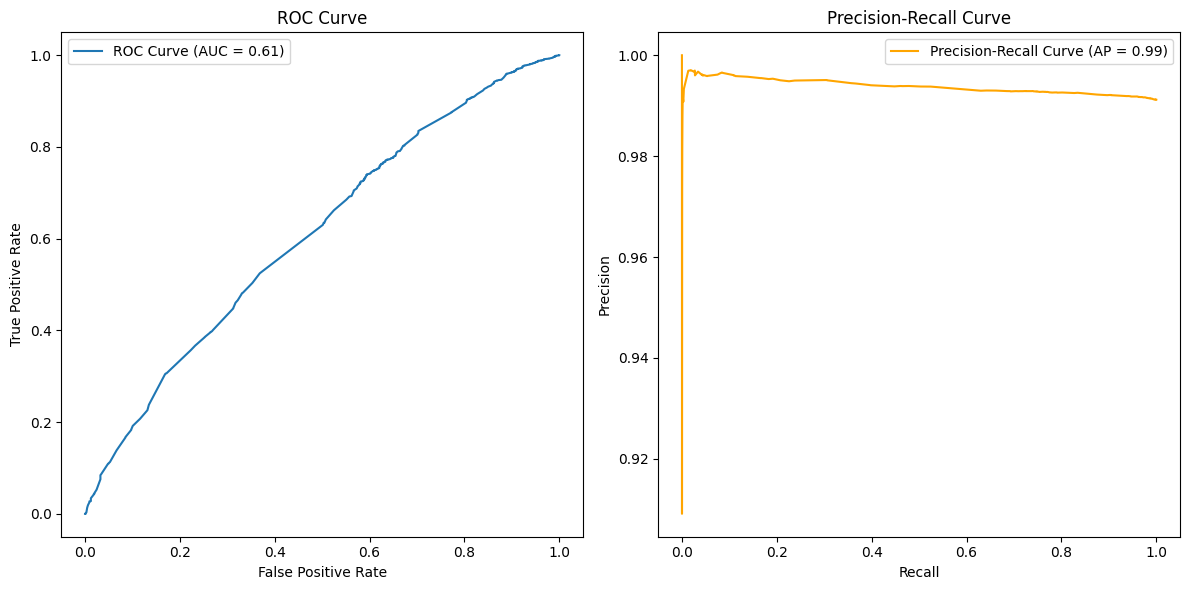

In [1]:
#SVM w/ NCL
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score, roc_curve,
    confusion_matrix, precision_recall_curve, average_precision_score
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from imblearn.under_sampling import NeighbourhoodCleaningRule

file_path_v2 = 'C:/Users/kentv/OneDrive/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv2.csv'
data_v2 = pd.read_csv(file_path_v2)  # Reduced feature dataset

target_col = 'INF_LIVE'

def preprocess_and_split(data, target_col):
    data = data.drop(columns=['ID'], errors='ignore') 
    
    X = data.drop(columns=[target_col])
    y = data[target_col]
    
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=2003, stratify=y
    )
    
    return X_train, X_test, y_train, y_test

def apply_ncl(X_train, y_train):
    ncl = NeighbourhoodCleaningRule(sampling_strategy='auto')
    X_resampled, y_resampled = ncl.fit_resample(X_train, y_train)
    return X_resampled, y_resampled

def evaluate_and_print_metrics(y_test, y_test_pred, y_test_proba, model, X_train):
    print("\nAccuracy:", accuracy_score(y_test, y_test_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))
    
    cm = confusion_matrix(y_test, y_test_pred)
    tn, fp, fn, tp = cm.ravel()
    print(f"\nTrue Positive Rate: {tp / (tp + fn):.2f}")
    print(f"True Negative Rate: {tn / (tn + fp):.2f}")
    
    print("\nConfusion Matrix:")
    print(cm)
    
    # ROC Curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
    auc = roc_auc_score(y_test, y_test_proba)
    print(f"\nROC AUC: {auc:.2f}")
    
    plt.figure(figsize=(12, 6)) 
    
    # ROC Curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    avg_precision = average_precision_score(y_test, y_test_proba)
    print(f"\nAverage Precision: {avg_precision:.2f}")
    
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f"Precision-Recall Curve (AP = {avg_precision:.2f})", color='orange')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()

    plt.tight_layout()  
    plt.show()

def train_and_evaluate(X_train, X_test, y_train, y_test):
    majority_class_count = sum(y_train == 1)
    minority_class_count = sum(y_train == 0)
    scale_pos_weight = majority_class_count / minority_class_count

    # Train SVM
    svm = SVC(
        C=1.0,          
        kernel='linear',     
        class_weight='balanced',  
        probability=True, 
        random_state=2003
    )
    svm.fit(X_train, y_train)
    
    y_train_pred = svm.predict(X_train)
    y_test_pred = svm.predict(X_test)
    y_test_proba = svm.predict_proba(X_test)[:, 1]  
    
    evaluate_and_print_metrics(y_test, y_test_pred, y_test_proba, svm, X_train)

print("\nReduced Feature Dataset (v2):")
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = preprocess_and_split(data_v2, target_col)
X_train_reduced_ncl, y_train_reduced_ncl = apply_ncl(X_train_reduced, y_train_reduced)
train_and_evaluate(X_train_reduced_ncl, X_test_reduced, y_train_reduced_ncl, y_test_reduced)